In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime   # package that helps manipulate dates
import matplotlib.dates as mdates
import calendar

from dateutil.parser import parse     # package for date parsing




In [3]:
szn_df = pd.read_csv('data/aqicn/shenzhen.csv')

In [4]:
def change_df (df):
    data = df.copy()
    data.date = pd.to_datetime(data.date)
    data = data.sort_values(by ='date', ascending= False)

    data.columns = ['date','PM25','PM10','O3','NO2','SO2','CO']

    for col in data.columns:
        if col != 'date':
            data[col] = pd.to_numeric(data[col], errors ='coerce')
    data = data.dropna()
    data = data.sort_values('date', ascending =False)
    return data

szn_df = change_df(szn_df)

In [5]:
szn_df ['NO2/SO2'] = szn_df['NO2']/szn_df['SO2']

In [6]:
from utils import plot_df, air_pairplot, air_cormatrix, monthlyAverage, df_ratio

In [7]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})  # increase dots per inch ...

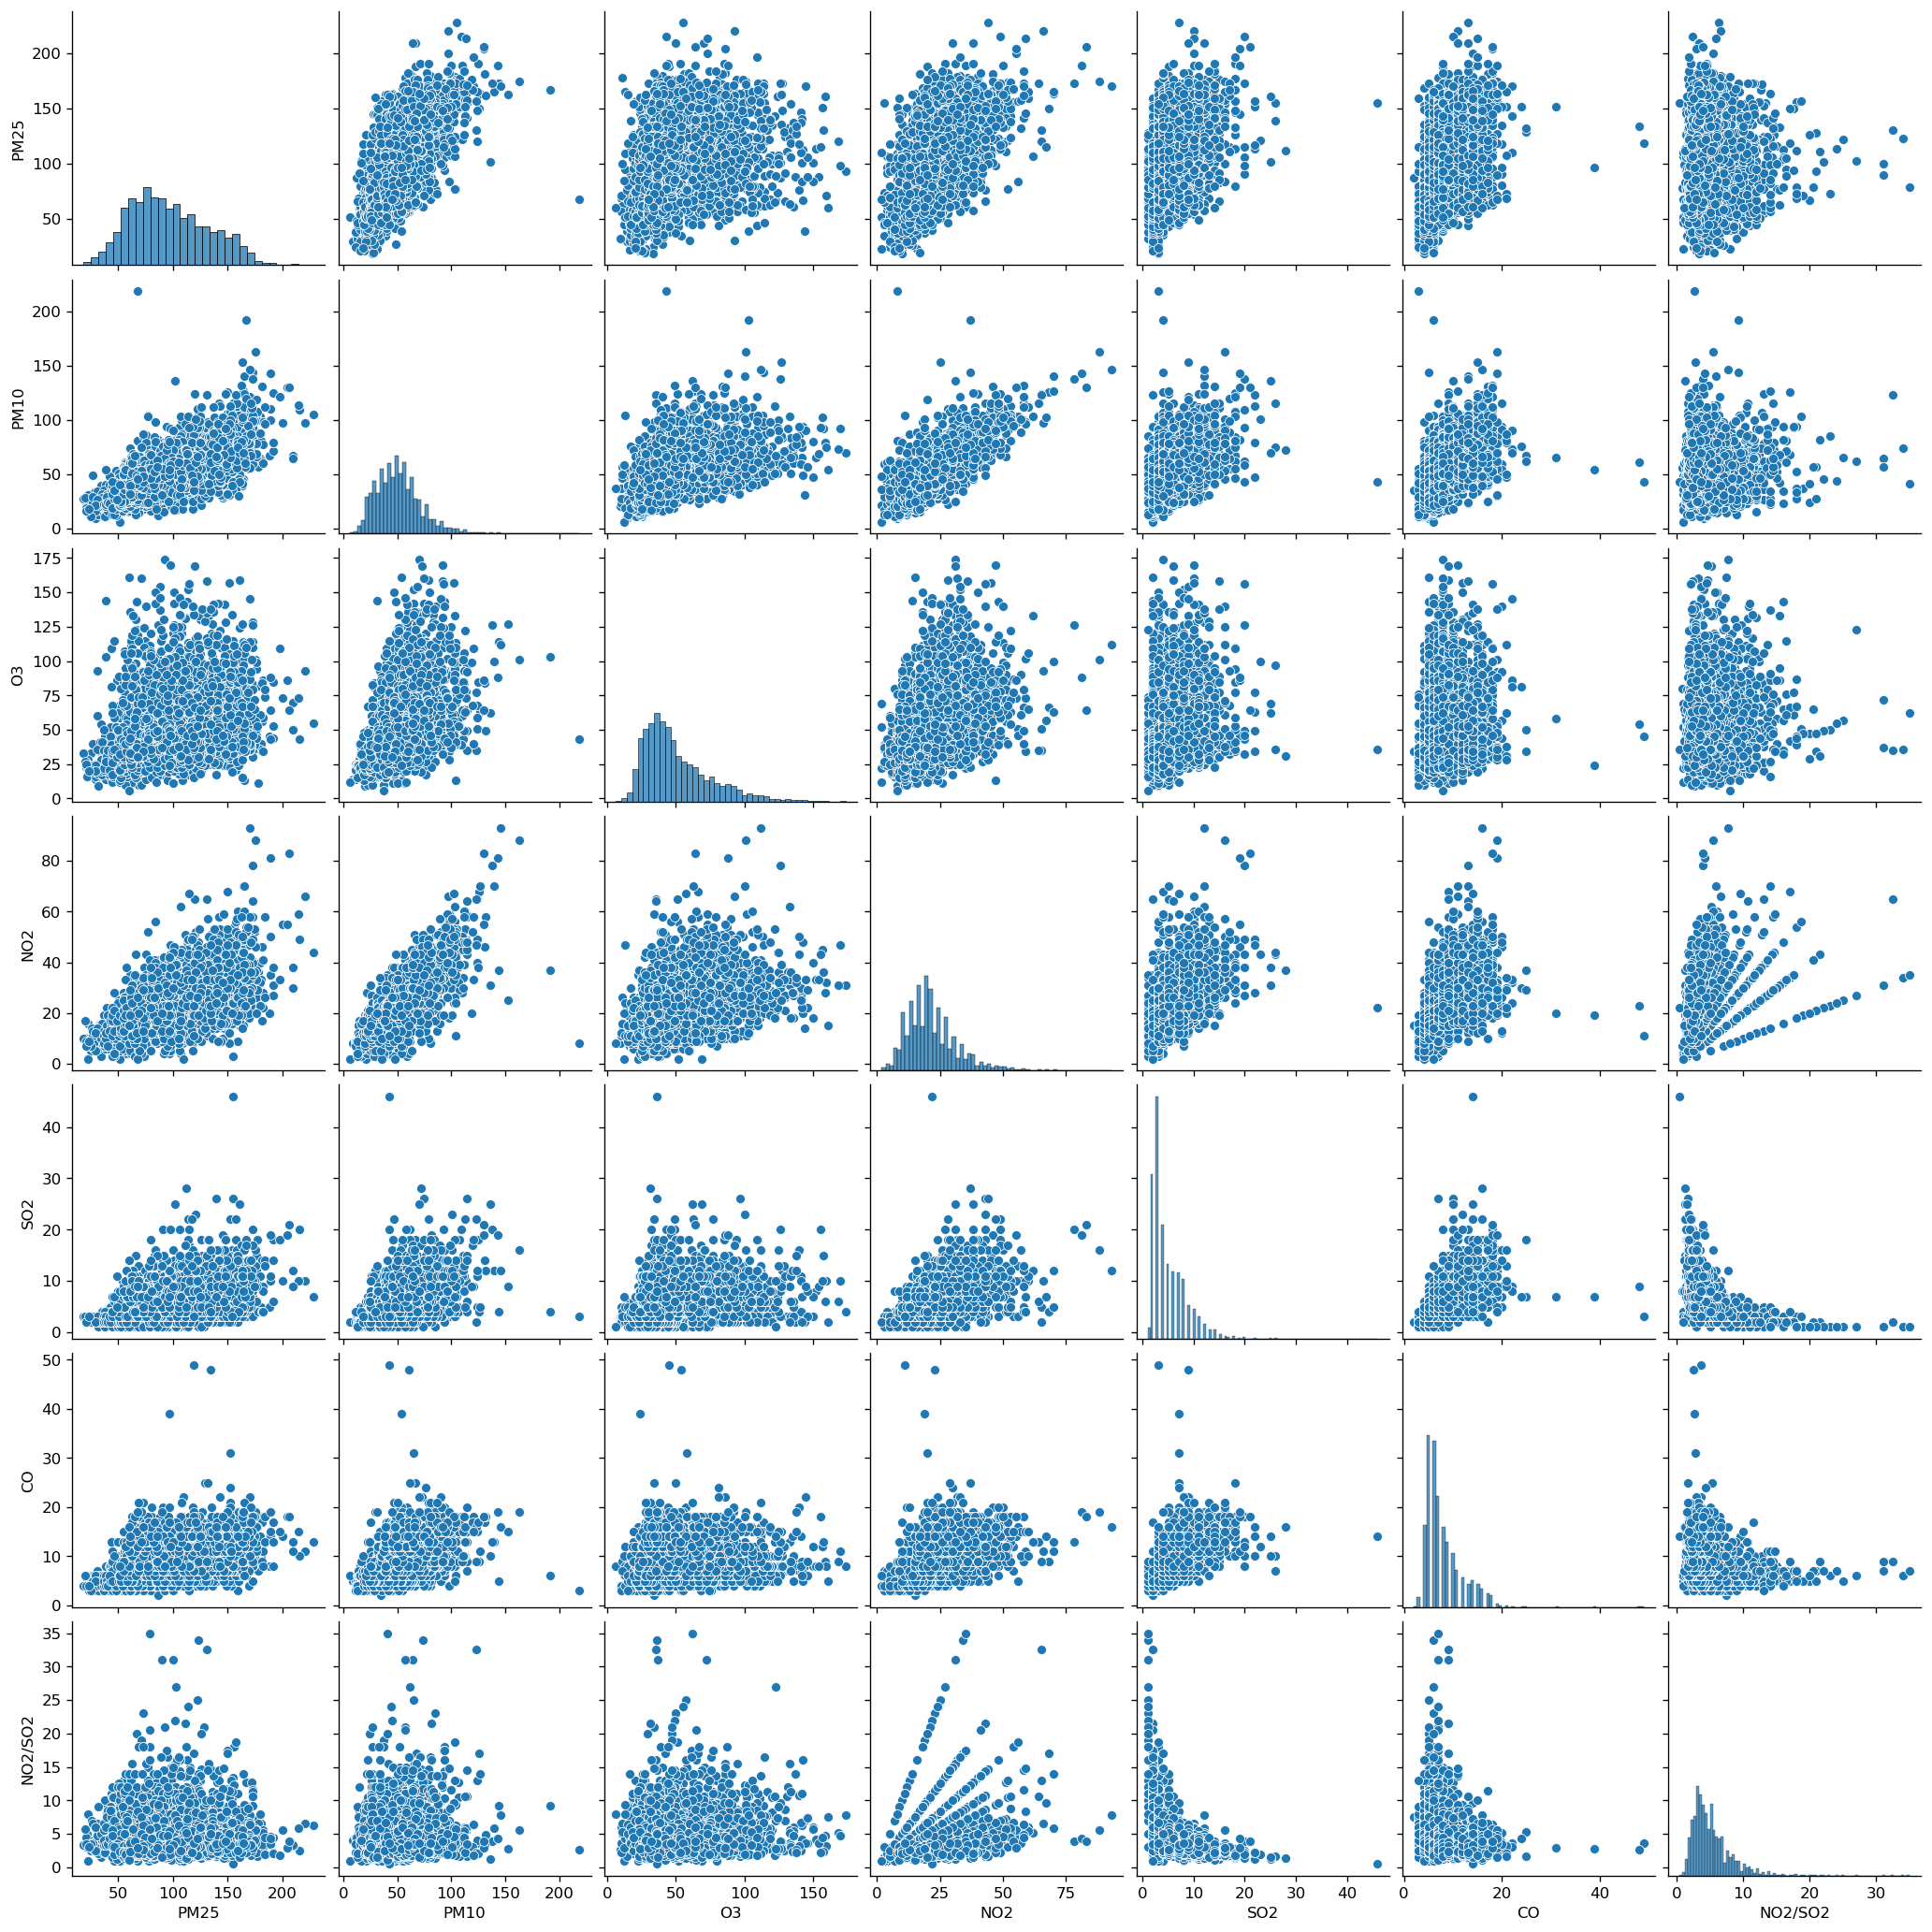

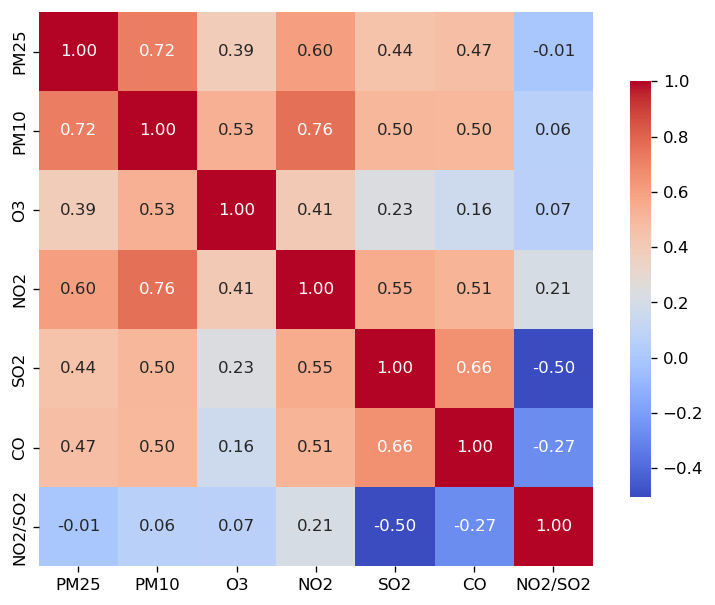

In [8]:
air_pairplot(szn_df)
air_cormatrix(szn_df)

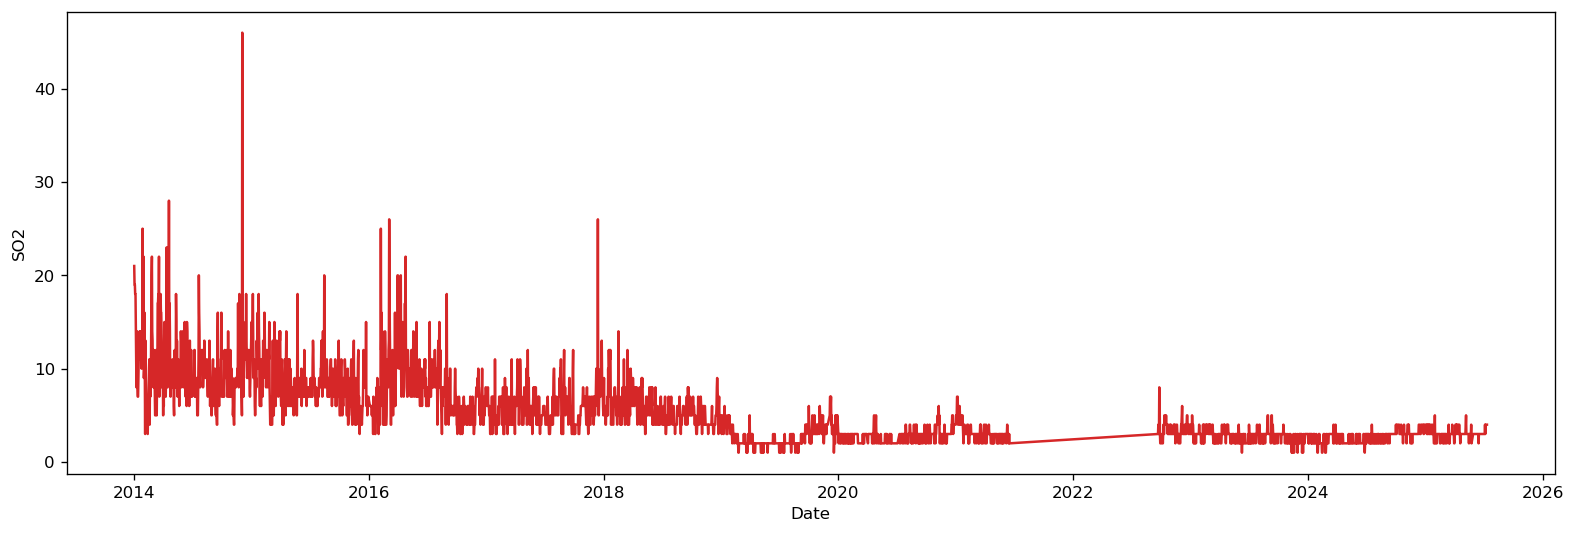

In [9]:
plot_df(szn_df, szn_df.date, szn_df.SO2, xlabel ='Date', ylabel ='SO2')

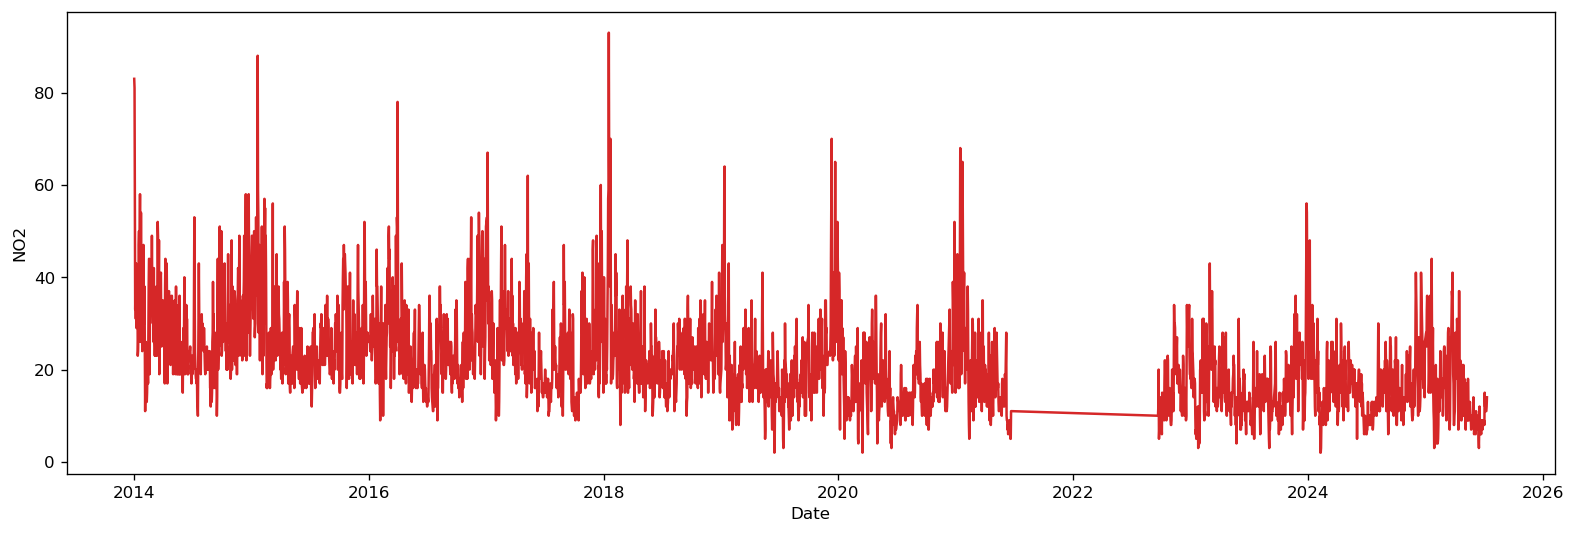

In [10]:
plot_df(szn_df, szn_df.date, szn_df.NO2, xlabel ='Date', ylabel ='NO2')

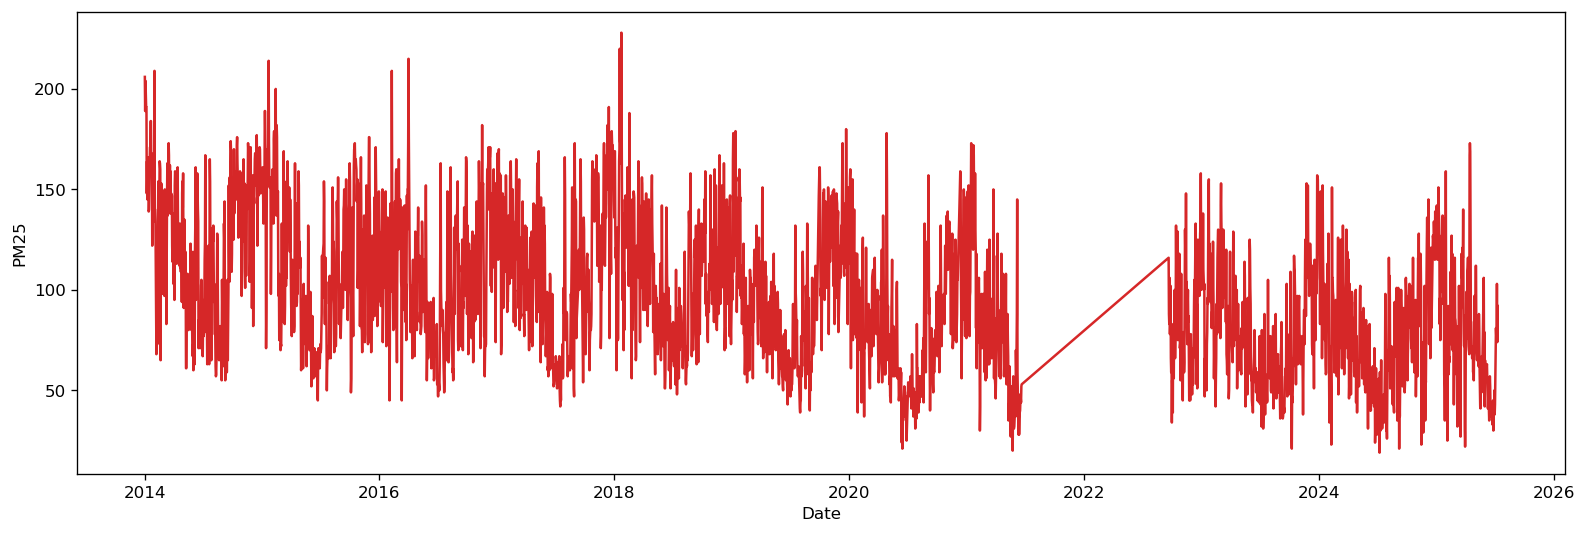

In [11]:
plot_df(szn_df, szn_df.date, szn_df.PM25, xlabel ='Date', ylabel ='PM25')

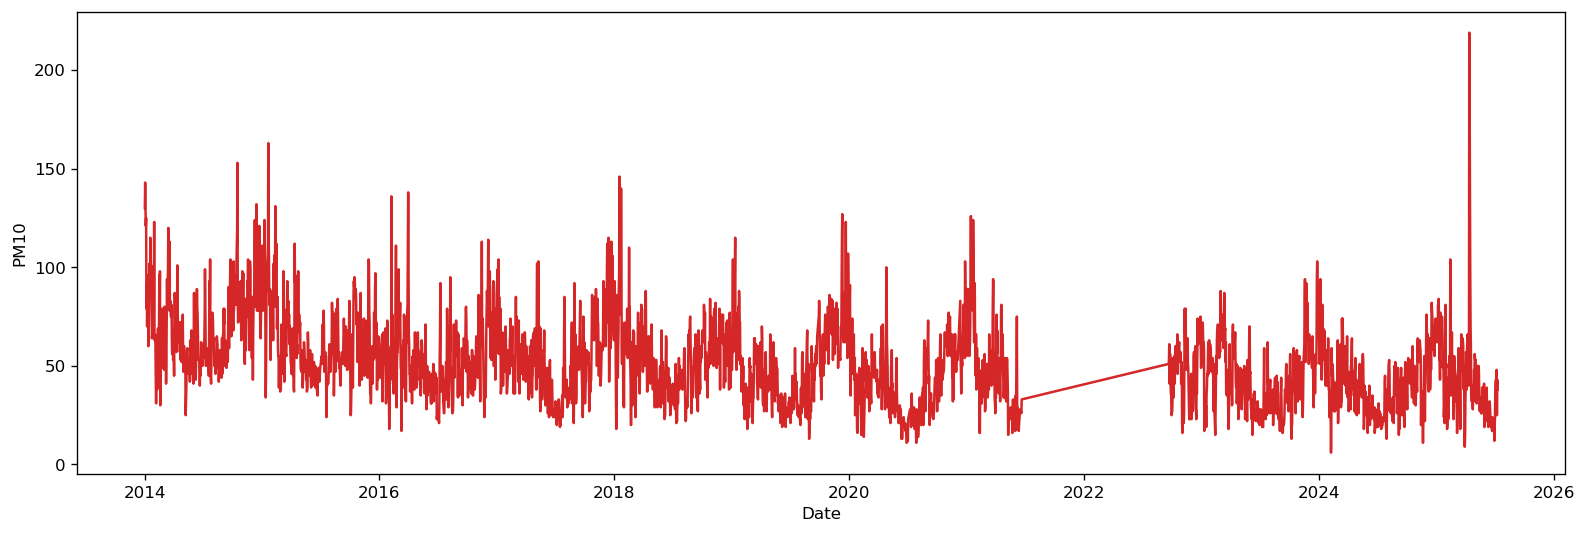

In [12]:
plot_df(szn_df, szn_df.date, szn_df.PM10, xlabel ='Date', ylabel ='PM10')

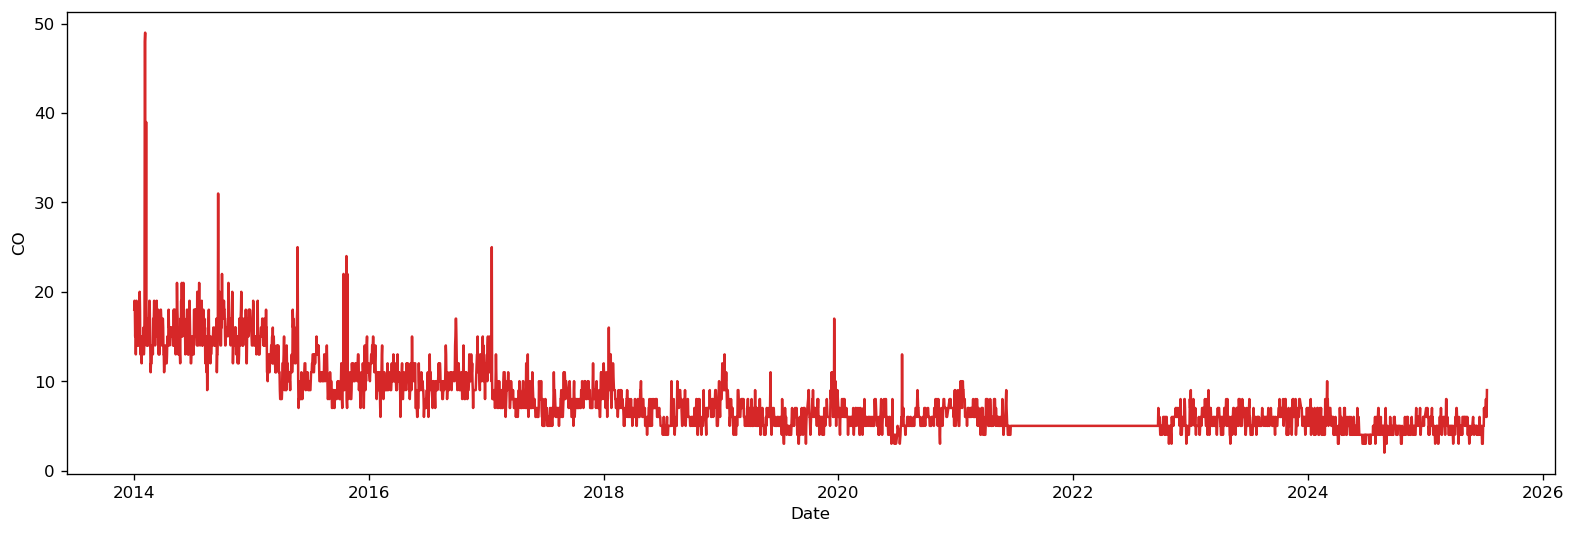

In [13]:
plot_df(szn_df, szn_df.date, szn_df.CO, xlabel ='Date', ylabel ='CO')

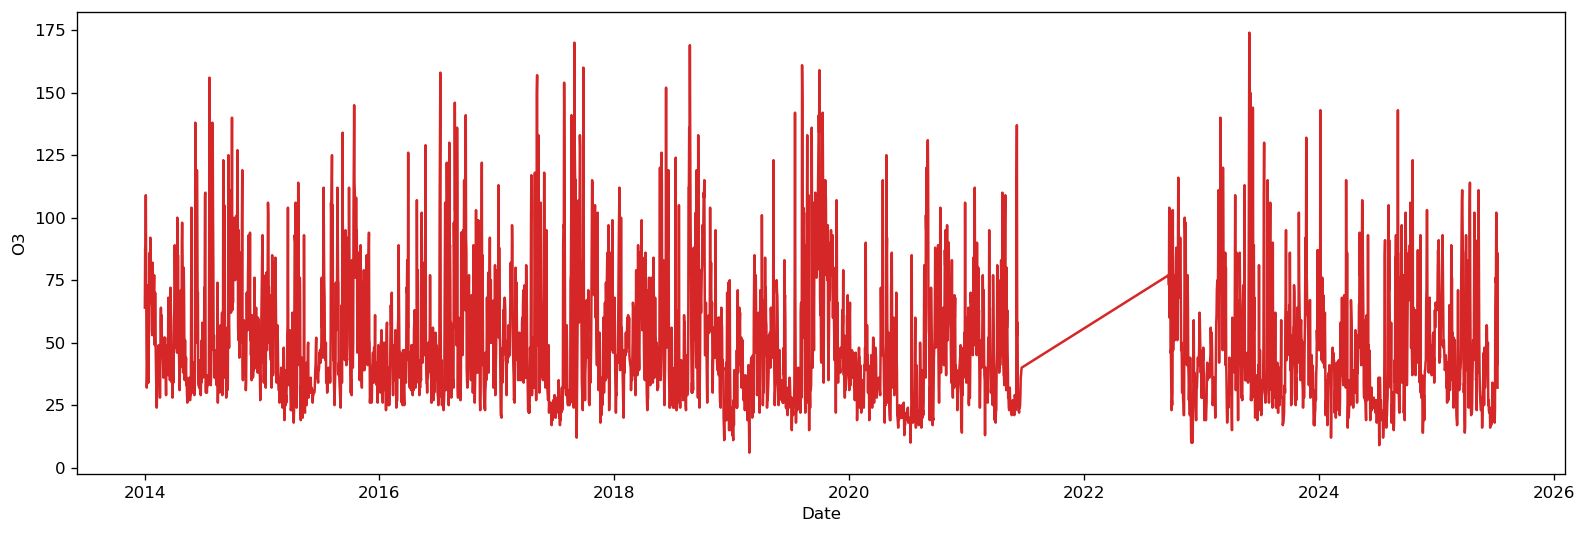

In [14]:
plot_df(szn_df, szn_df.date, szn_df.O3, xlabel ='Date', ylabel ='O3')

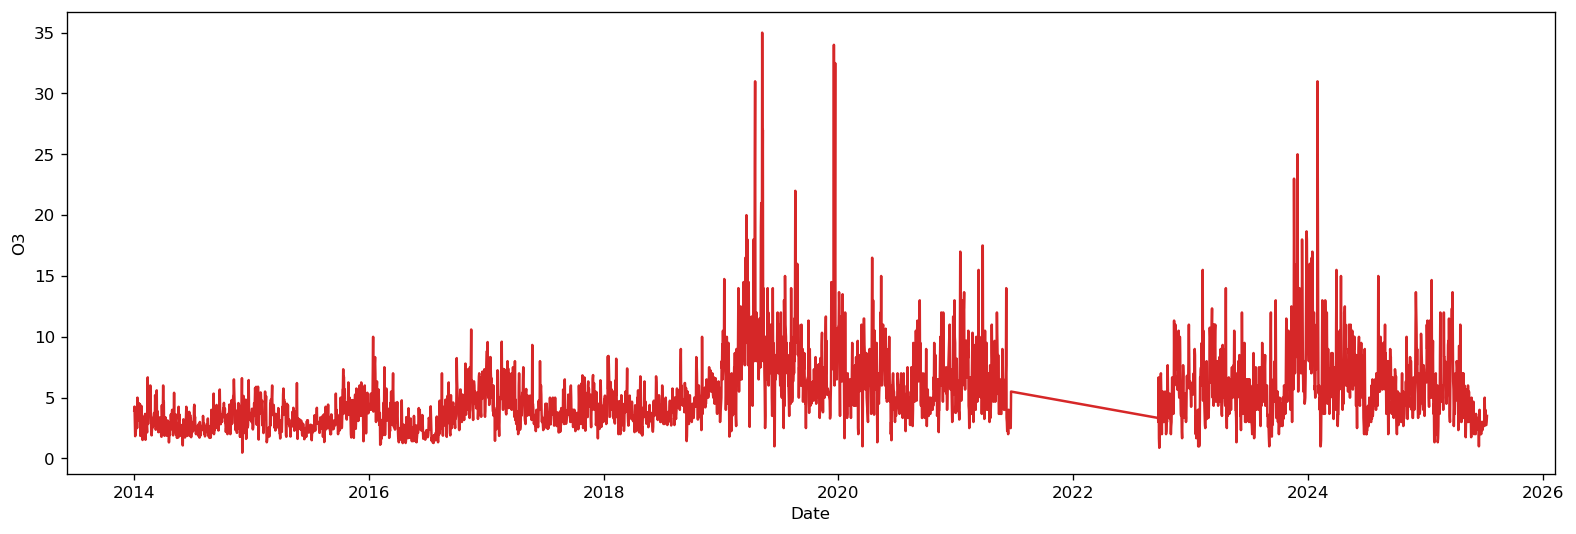

In [15]:
plot_df(szn_df, szn_df.date, szn_df.NO2/szn_df.SO2, xlabel ='Date', ylabel ='O3')

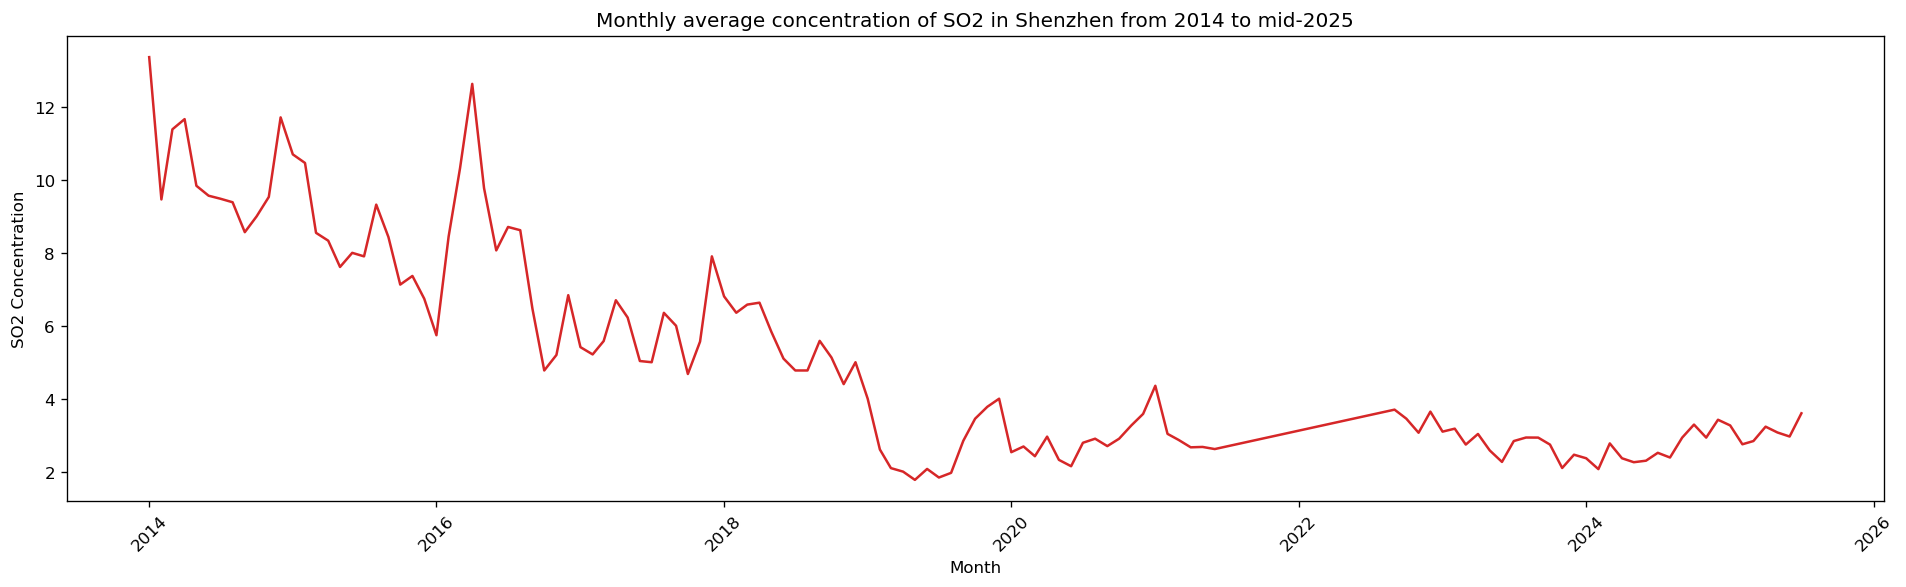

In [16]:
monthlyAverage(szn_df, 'Shenzhen','SO2')

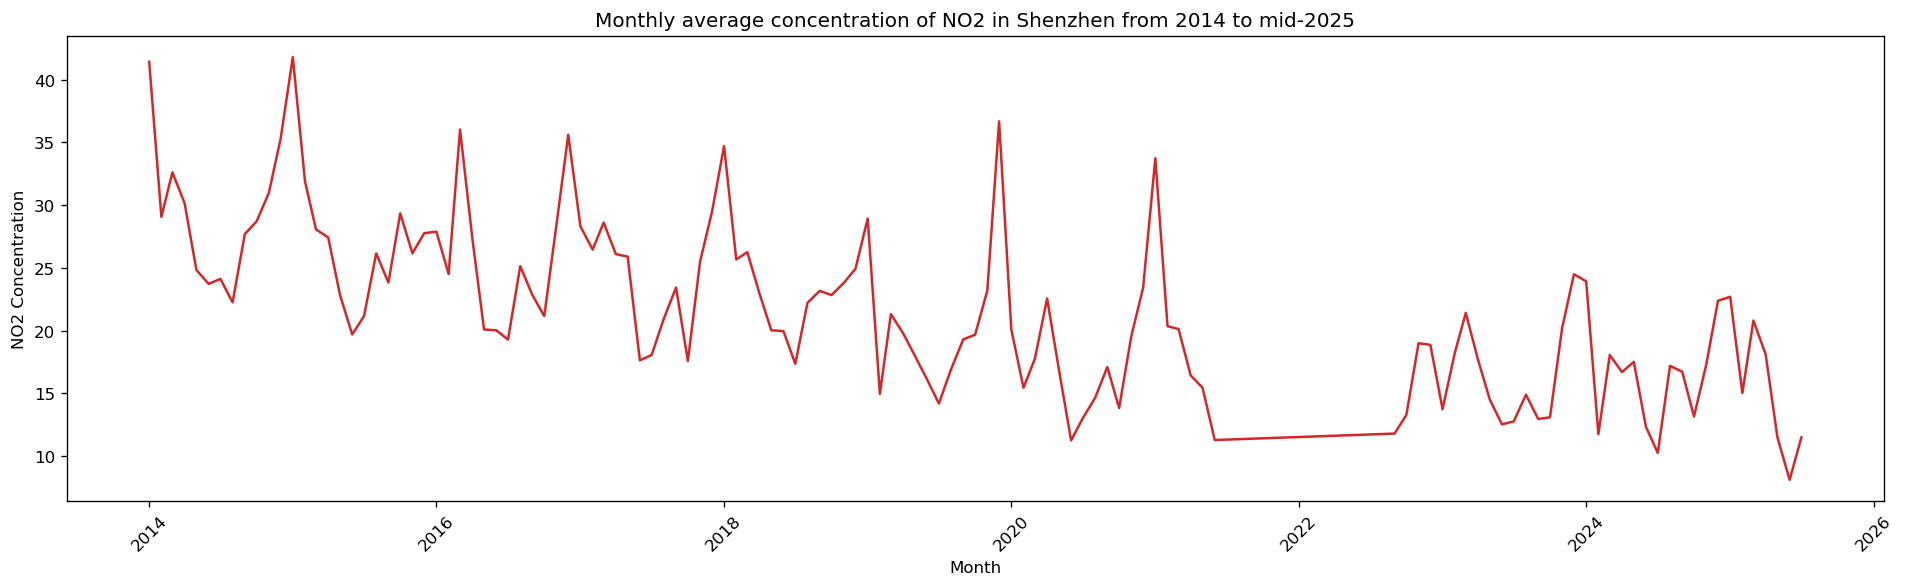

In [17]:
monthlyAverage(szn_df, 'Shenzhen','NO2')

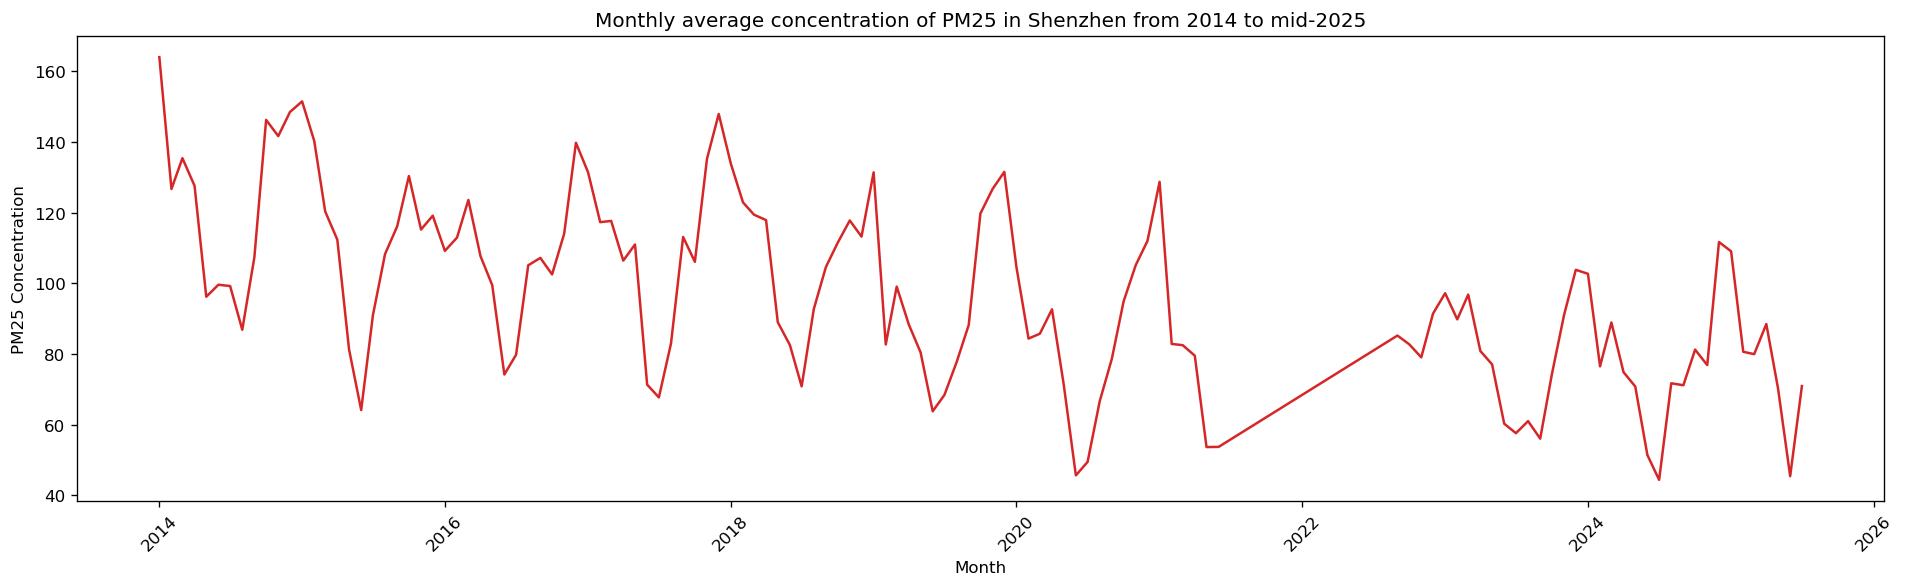

In [18]:
monthlyAverage(szn_df, 'Shenzhen','PM25')

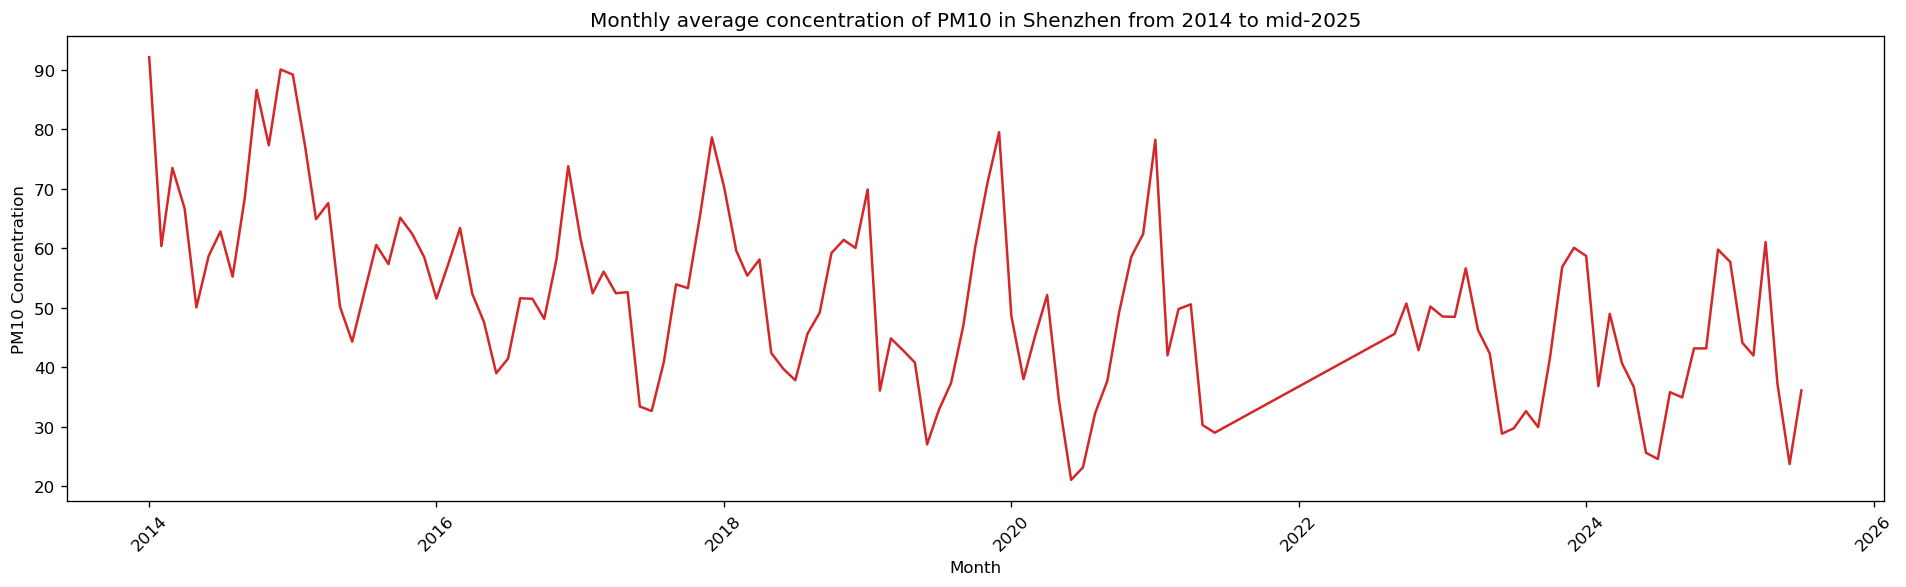

In [19]:
monthlyAverage(szn_df, 'Shenzhen','PM10')

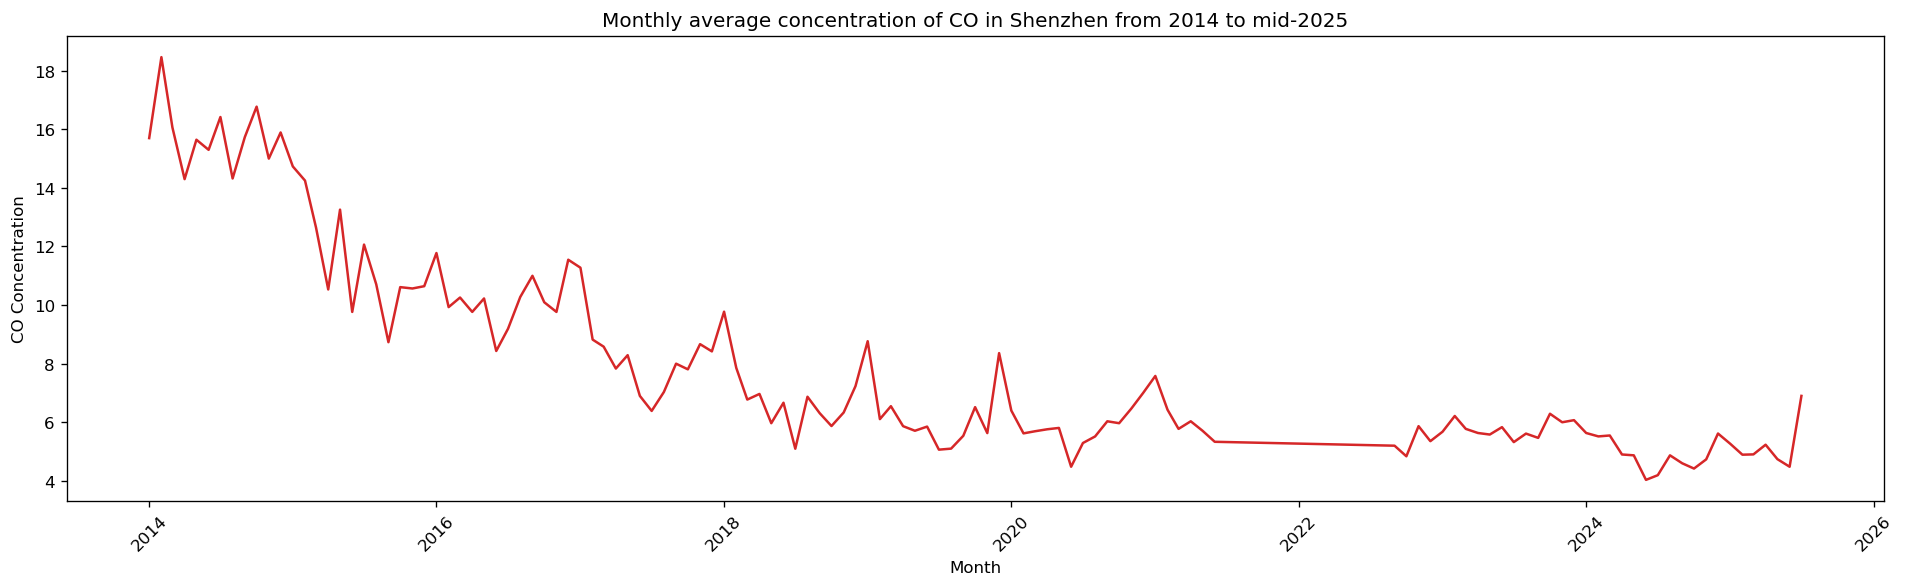

In [20]:
monthlyAverage(szn_df, 'Shenzhen','CO')

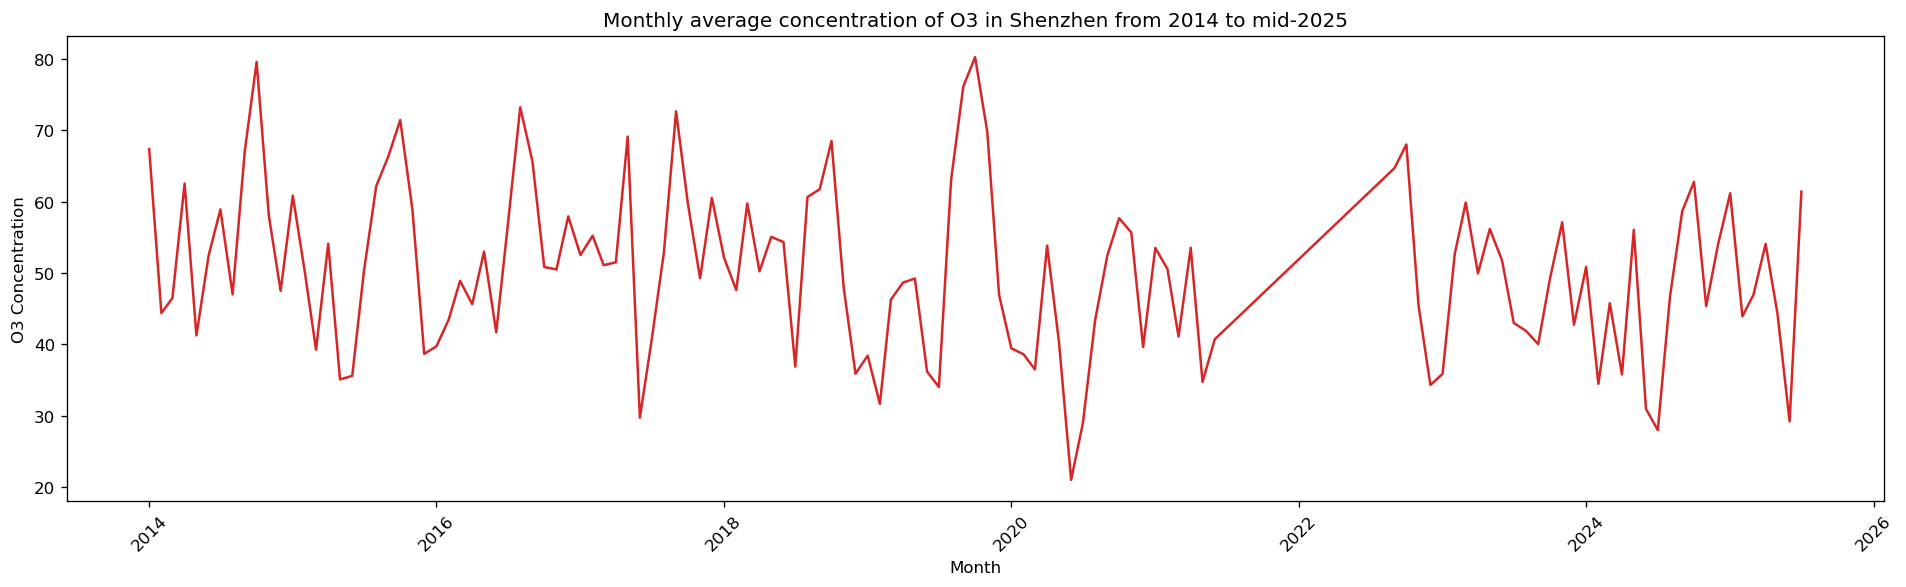

In [21]:
monthlyAverage(szn_df, 'Shenzhen','O3')

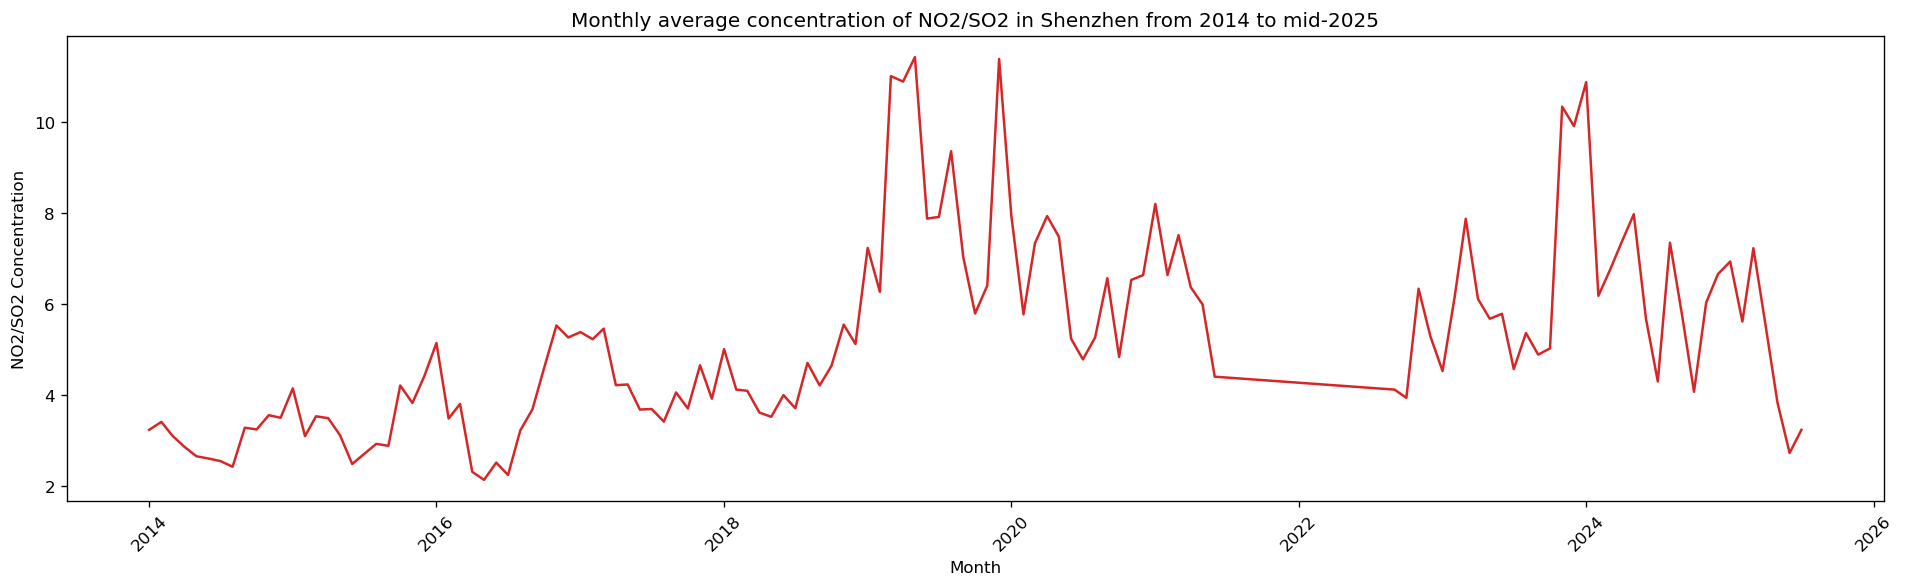

In [22]:
monthlyAverage(szn_df, 'Shenzhen','NO2/SO2')

# Considering the change of pollutants.

Let $P_t$ denote the value of air pollutant $P$ on day $t$, and $P_{t-1}$ the value on onday prior. To quantify day-to-day changes and capture the seasonal patterns, we consider the following expression:
$$
\log \frac{P_t}{P_{t-1}}
$$
This quantity allows us to measure how pollutant levels fluctuate over time and analyze the distribution of these changes.

Furthermore, to capture broader trends, we compute the cumulative sum of these daily changes.

In [23]:
df_ratio(szn_df)
szn_df_ratio = df_ratio(szn_df).drop(columns=['NO2/SO2'])
szn_df_ratio

date  PM25_ratio  PM10_ratio  O3_ratio  NO2_ratio  SO2_ratio  \
7    2025-07-09   -0.217723    0.123614  0.988611  -0.154151   0.000000   
6    2025-07-08    0.330664   -0.542324 -0.740775  -0.087011   0.000000   
5    2025-07-07   -0.265281    0.652325  0.861139   0.000000   0.000000   
4    2025-07-06   -0.025642   -0.182322  0.050262   0.000000   0.000000   
3    2025-07-05    0.050644    0.072321 -0.320908   0.087011  -0.287682   
...         ...         ...         ...       ...        ...        ...   
4095 2014-01-06    0.000000    0.458866  0.472359   0.203599   0.251314   
4094 2014-01-05    0.030930   -0.032523  0.248697  -0.141079   0.000000   
4093 2014-01-04    0.034916    0.071744 -0.237001   0.510826   0.054067   
4092 2014-01-03   -0.076373    0.095310  0.022990   0.387116   0.000000   
4091 2014-01-02    0.086129   -0.095310 -0.318454   0.024391   0.100083   

      CO_ratio  
7    -0.405465  
6     0.000000  
5     0.287682  
4    -0.133531  
3     0.000000  
...        ...  
4095  0.268264  
4094 -0.125163  
4093  0.182322  
4092  0.054067  
4091 -0.054067  

[3669 rows x 7 columns]

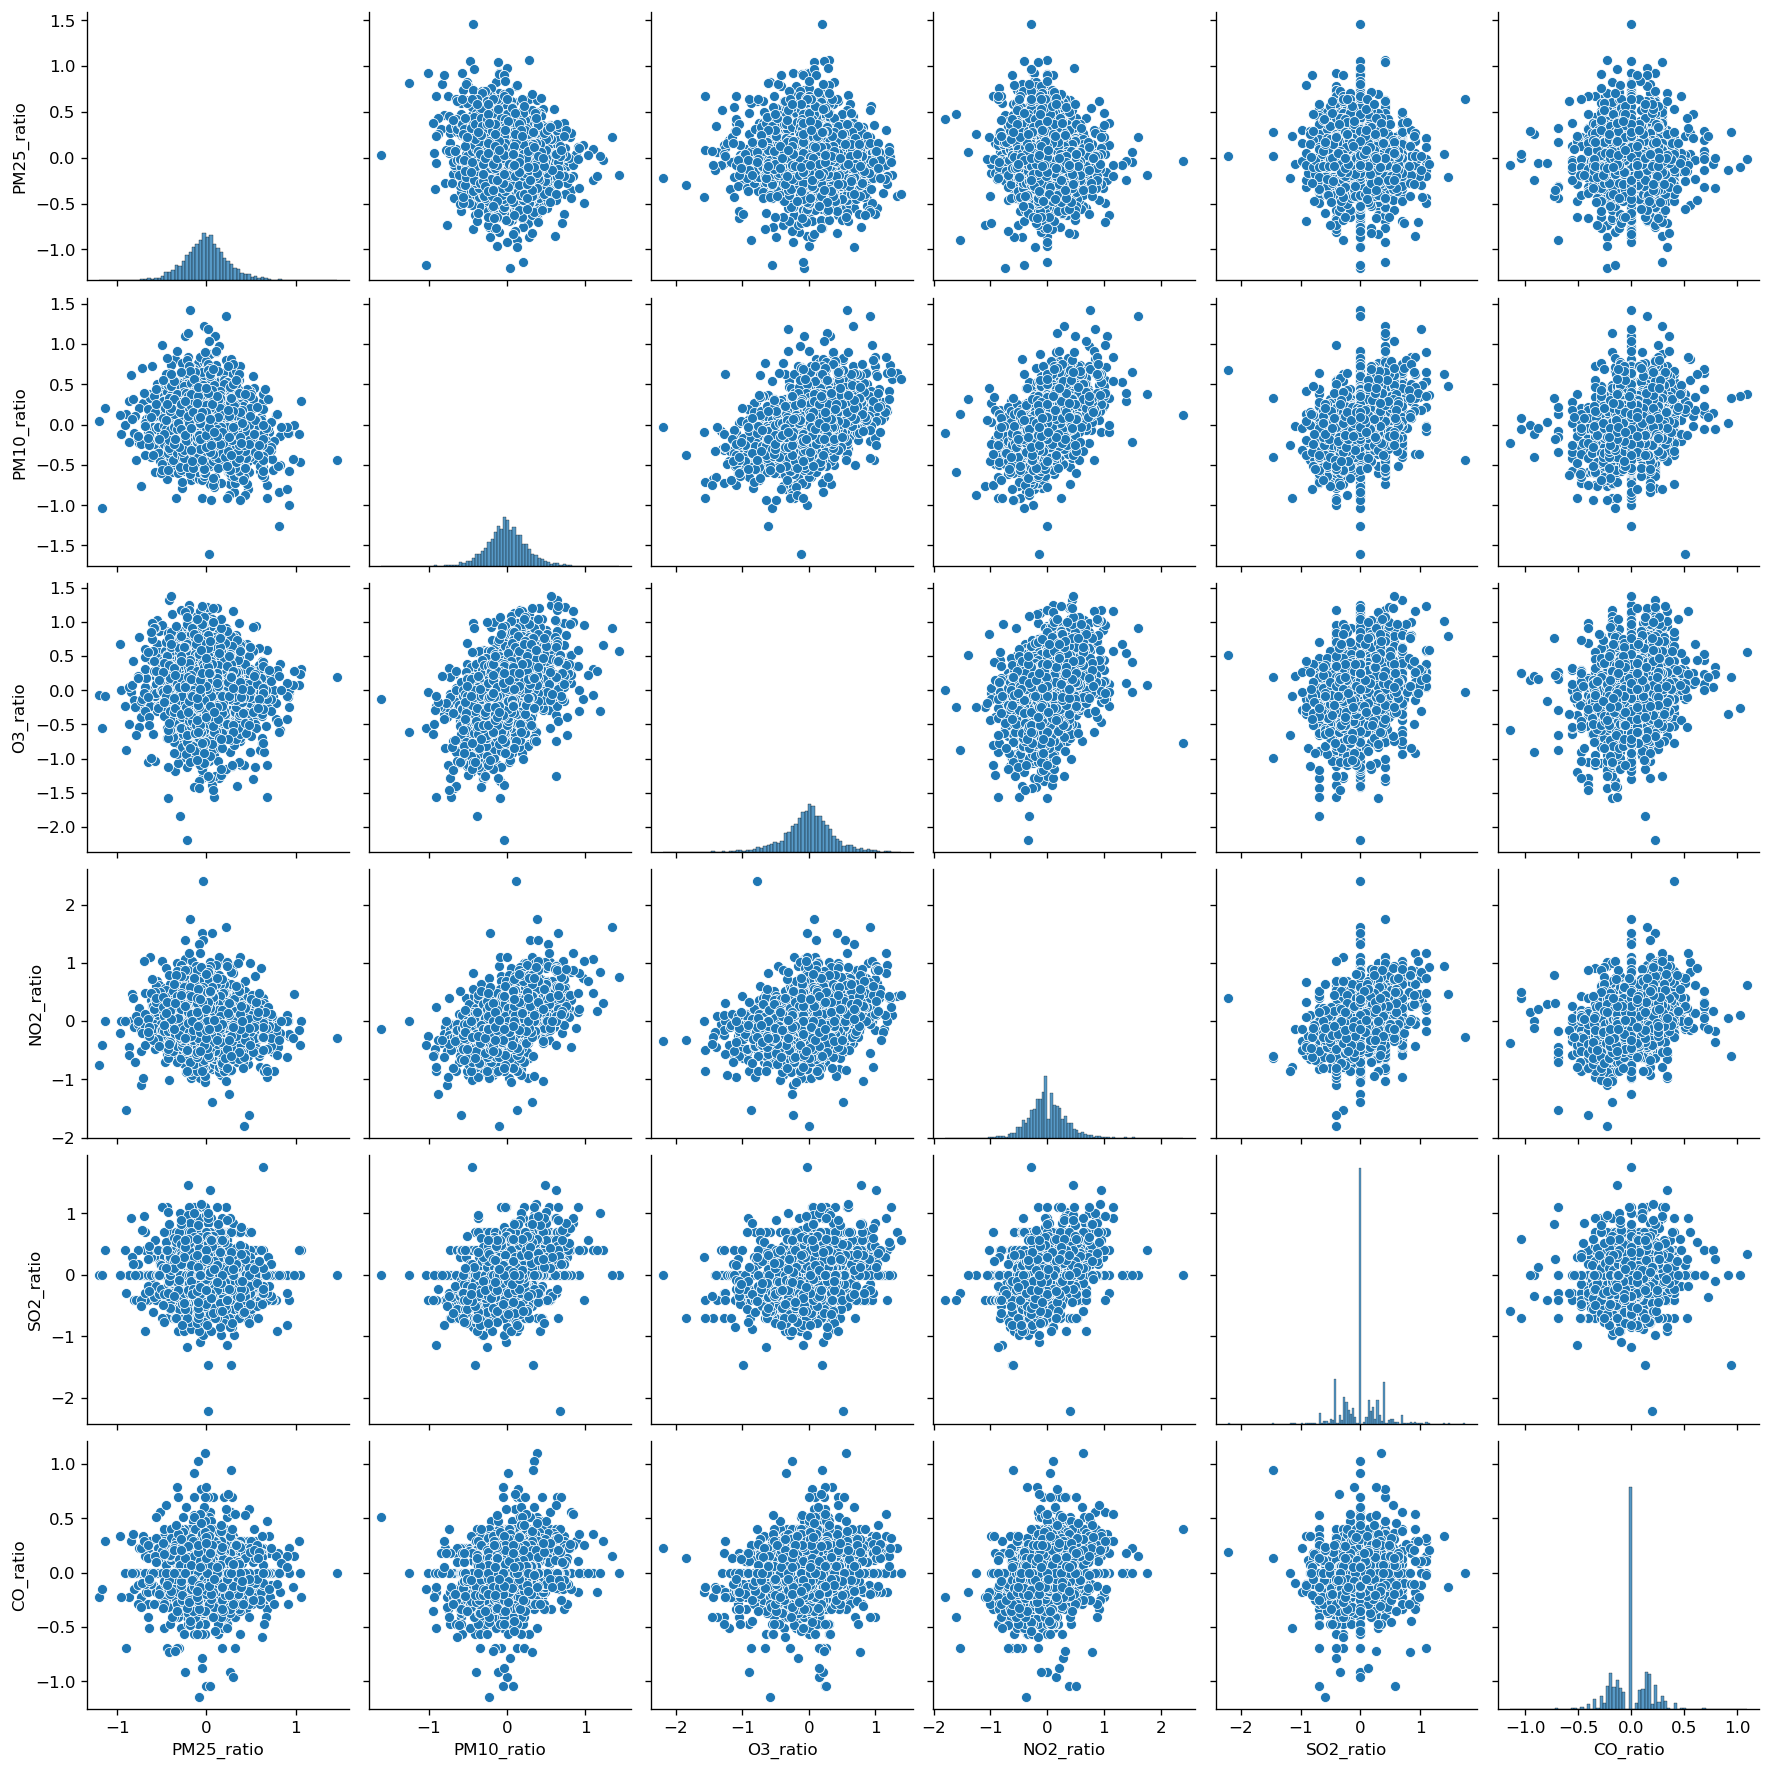

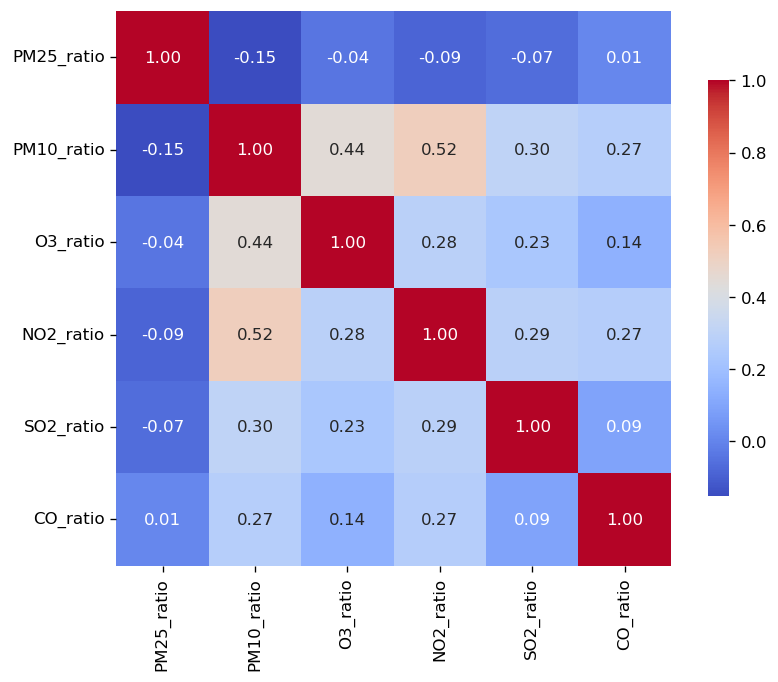

In [24]:
air_pairplot (szn_df_ratio)
air_cormatrix(szn_df_ratio)

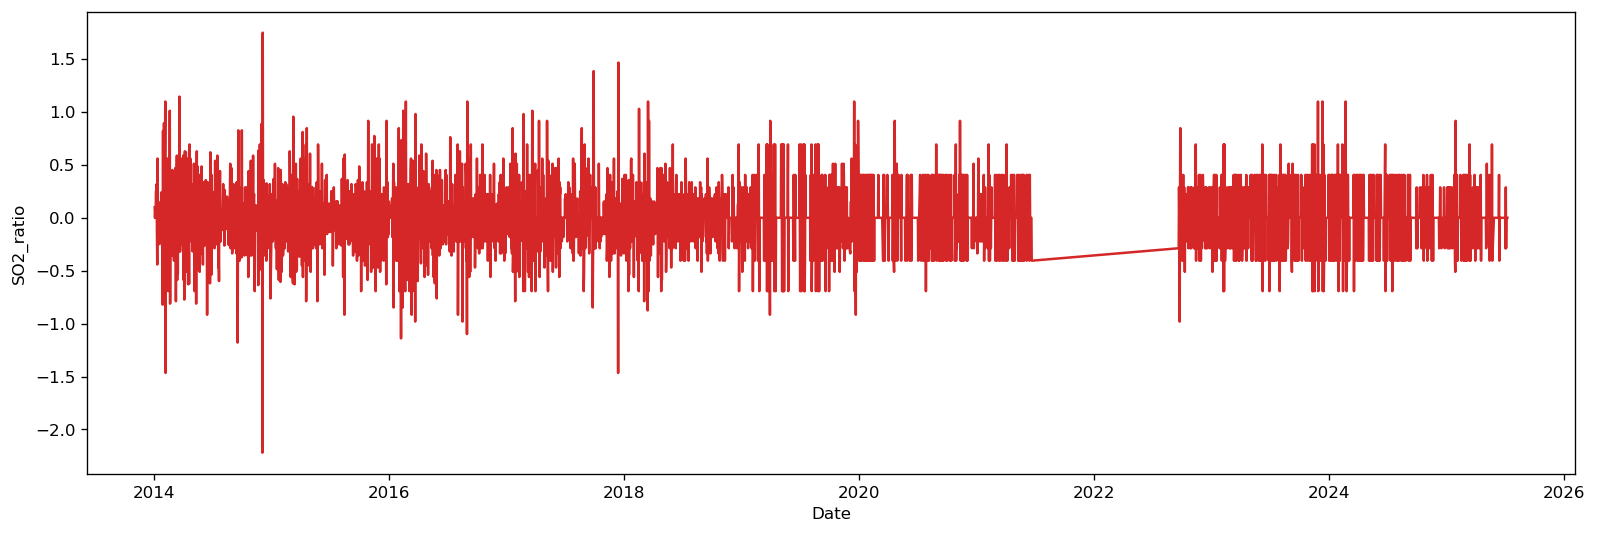

In [25]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

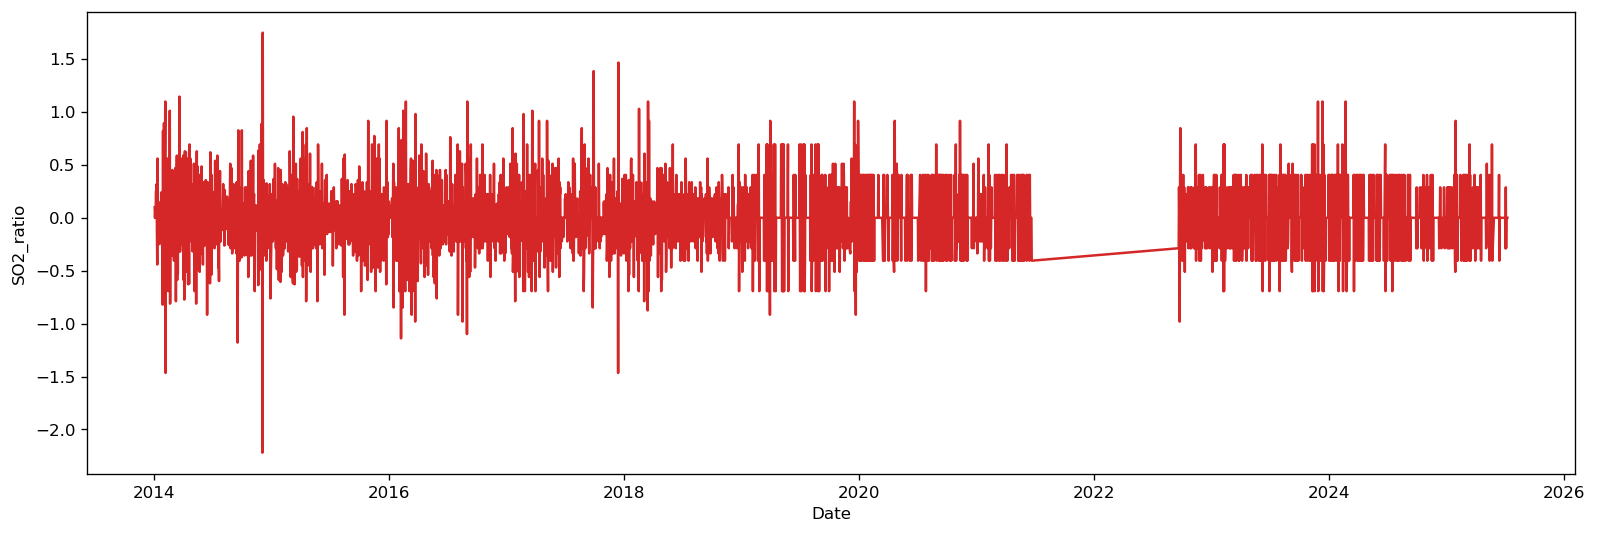

In [26]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.SO2_ratio, xlabel ='Date', ylabel ='SO2_ratio')

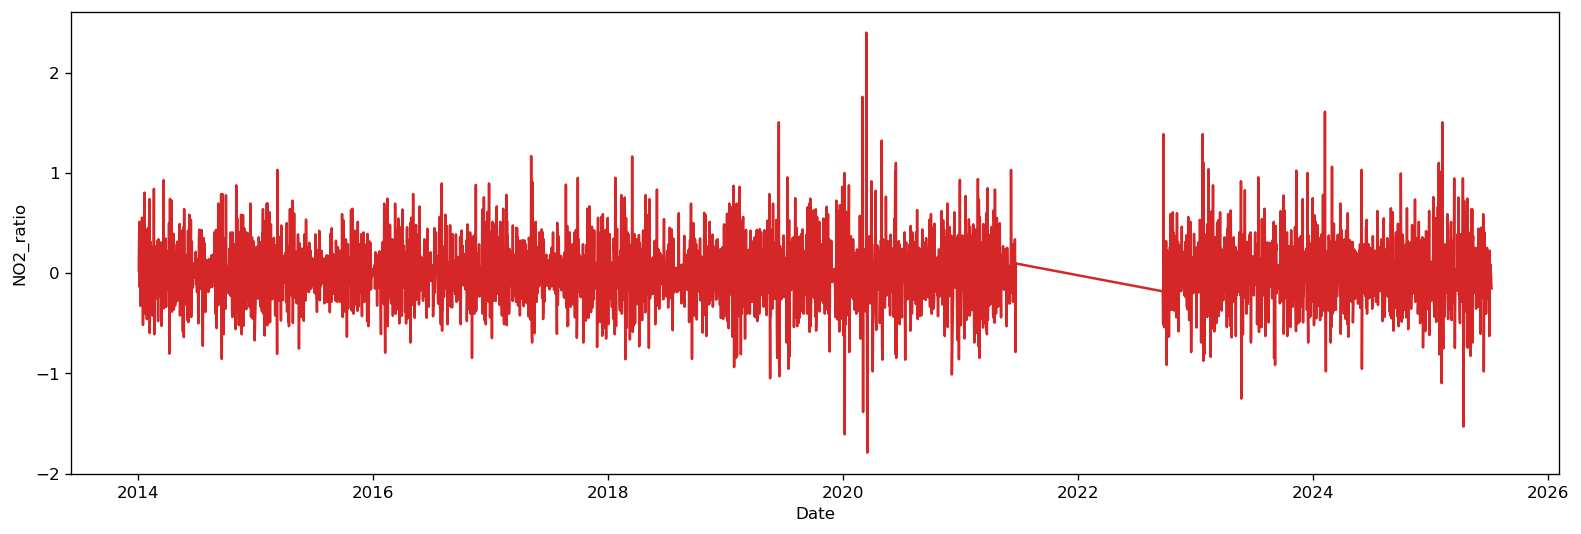

In [27]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.NO2_ratio, xlabel ='Date', ylabel ='NO2_ratio')

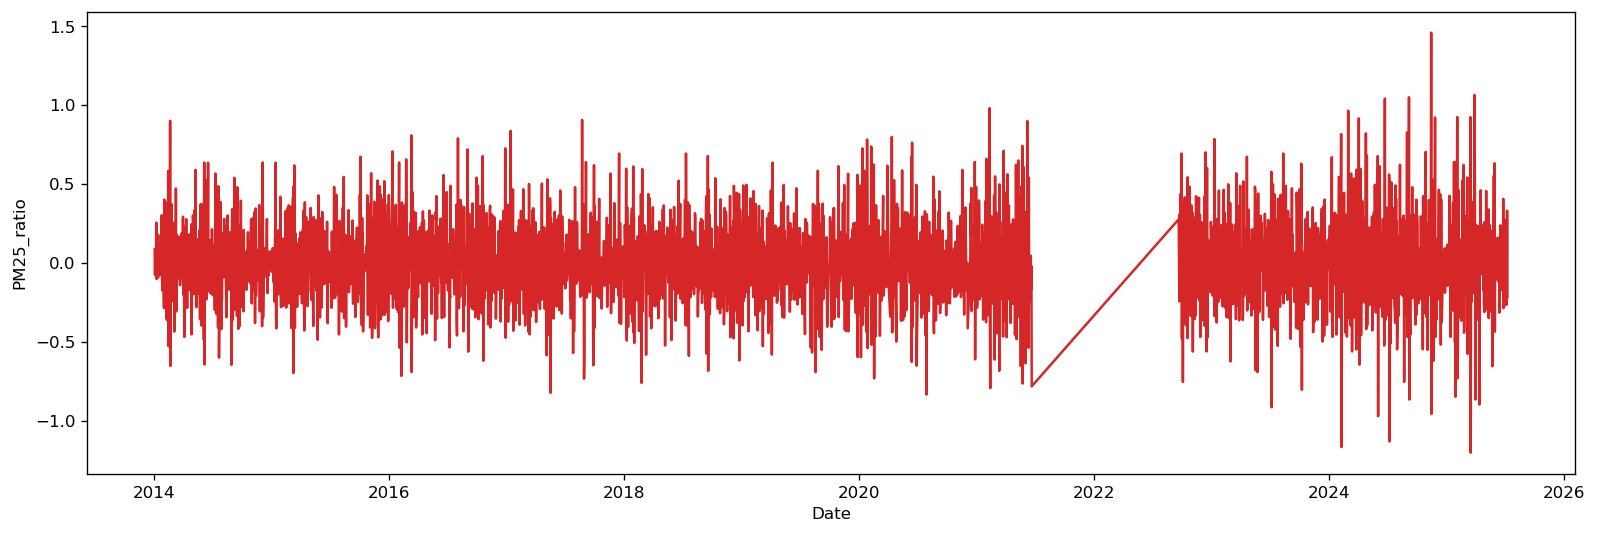

In [28]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.PM25_ratio, xlabel ='Date', ylabel ='PM25_ratio')

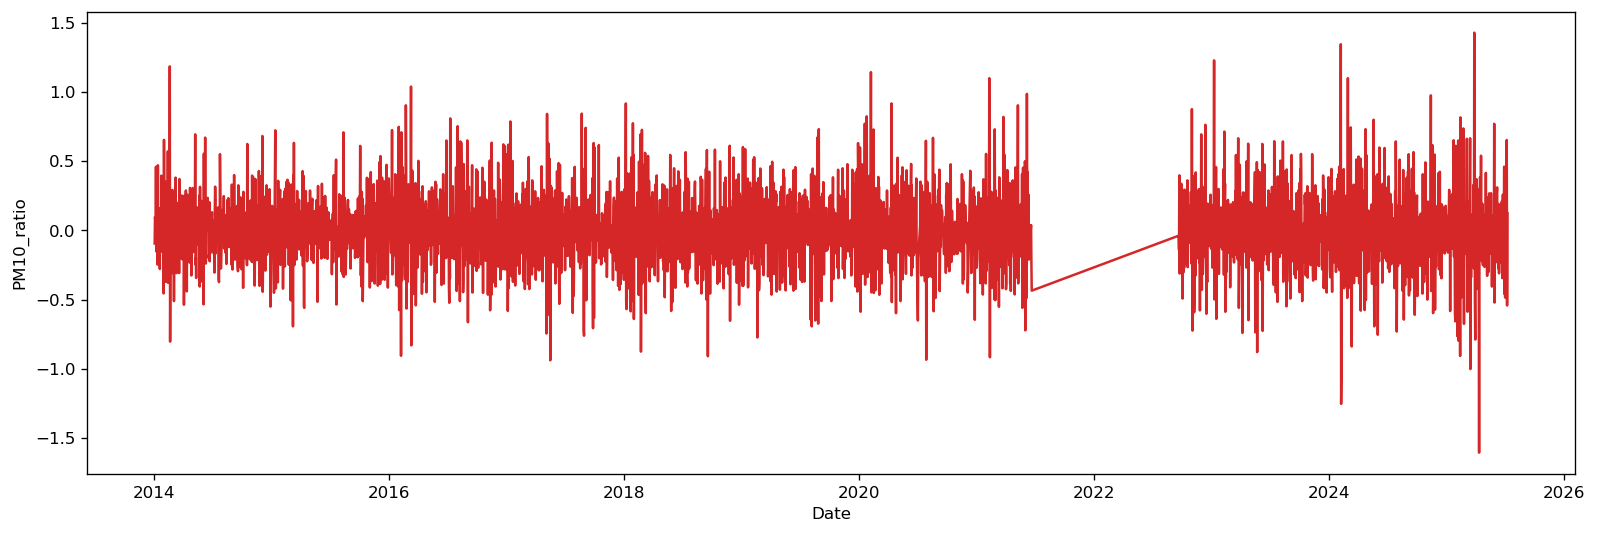

In [29]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.PM10_ratio, xlabel ='Date', ylabel ='PM10_ratio')

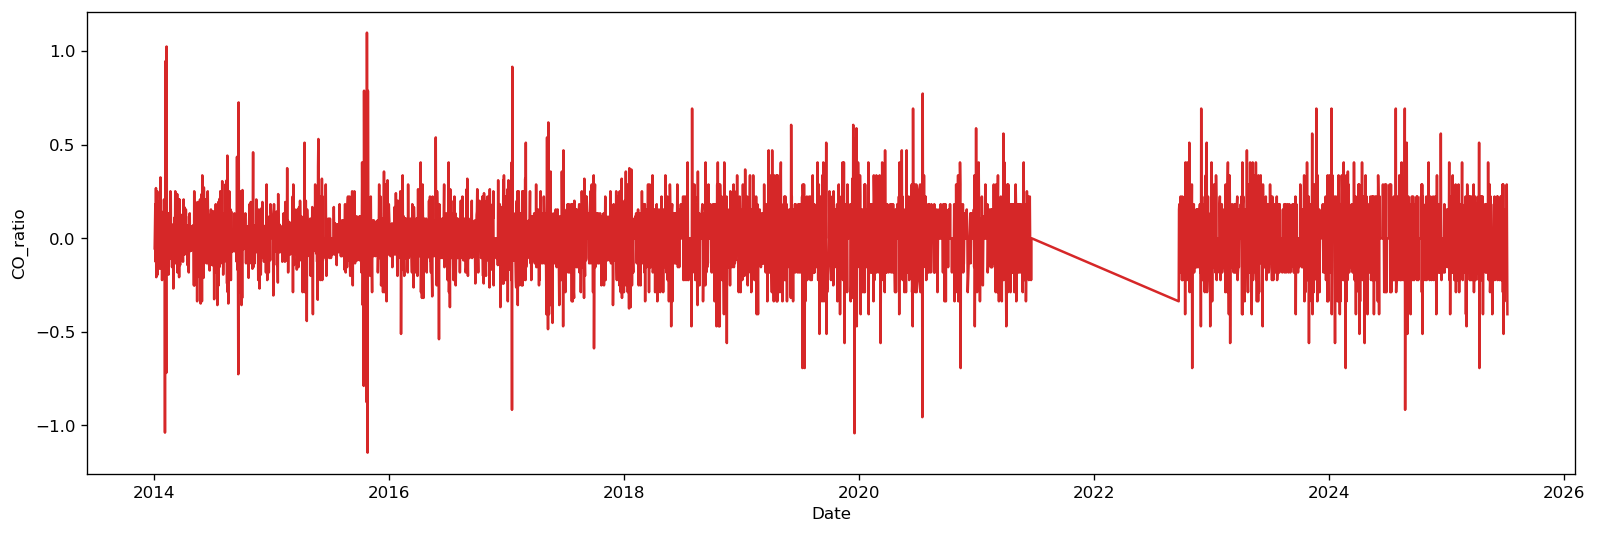

In [30]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.CO_ratio, xlabel ='Date', ylabel ='CO_ratio')

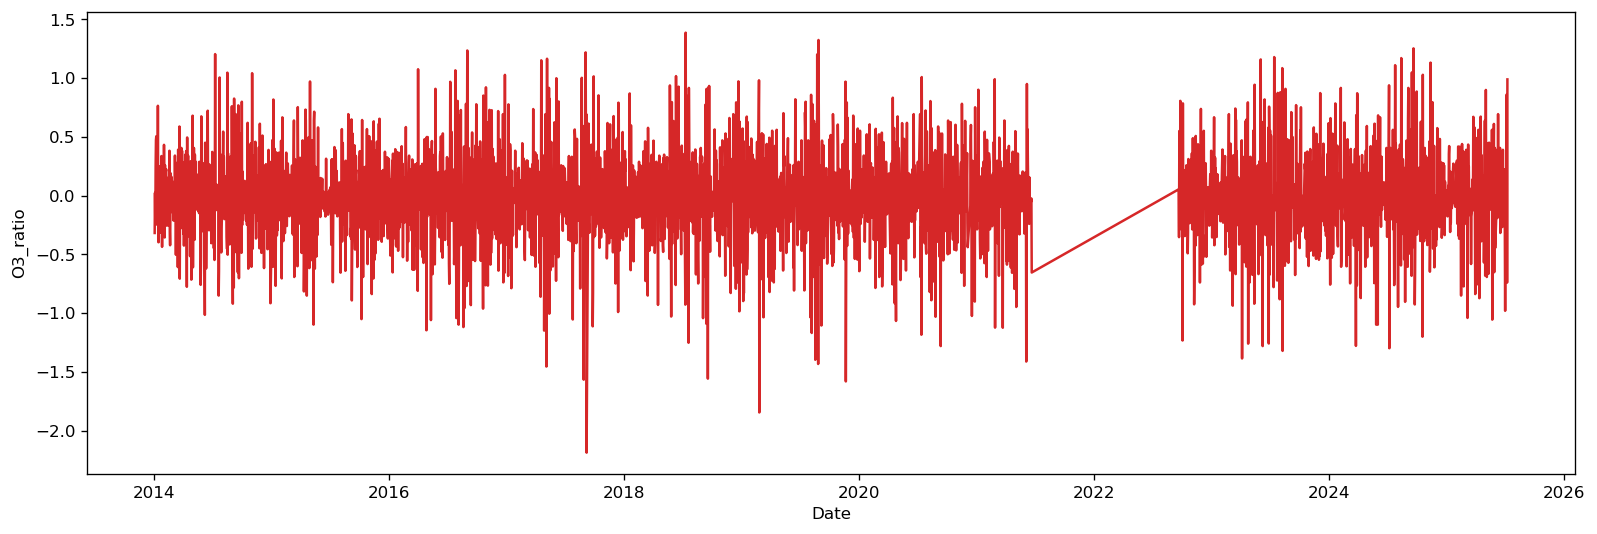

In [31]:
plot_df(szn_df_ratio, szn_df_ratio.date, szn_df_ratio.O3_ratio, xlabel ='Date', ylabel ='O3_ratio')

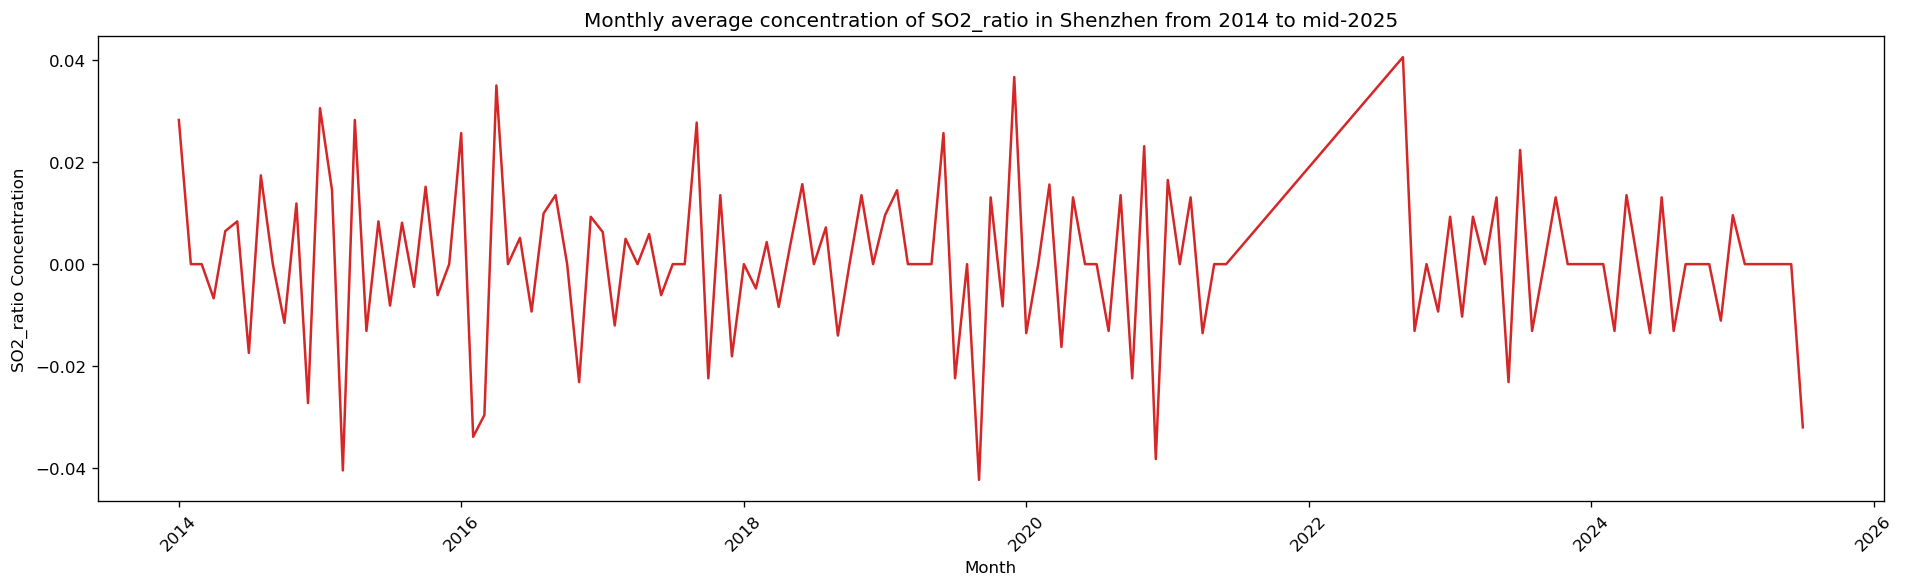

In [32]:
monthlyAverage(szn_df_ratio, 'Shenzhen','SO2_ratio')

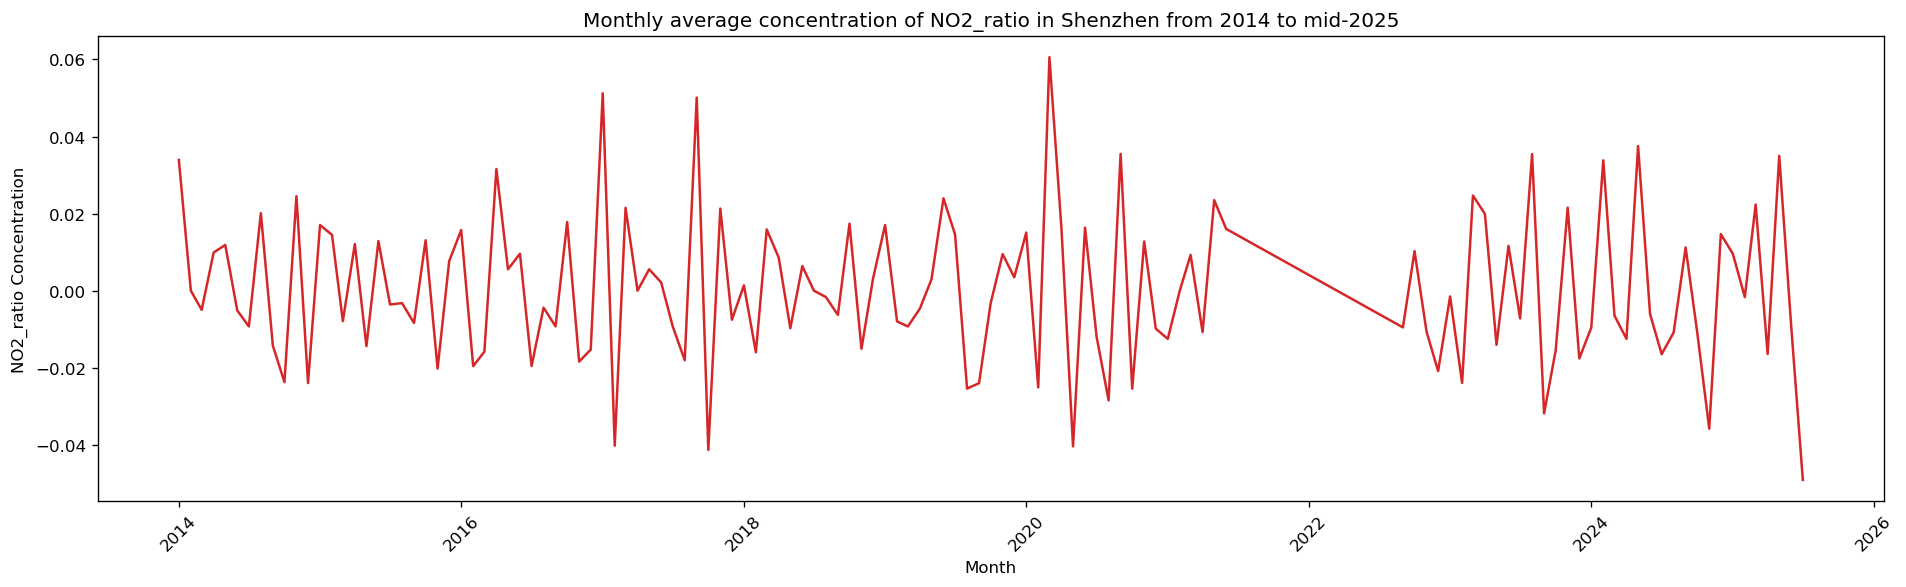

In [33]:
monthlyAverage(szn_df_ratio, 'Shenzhen','NO2_ratio')

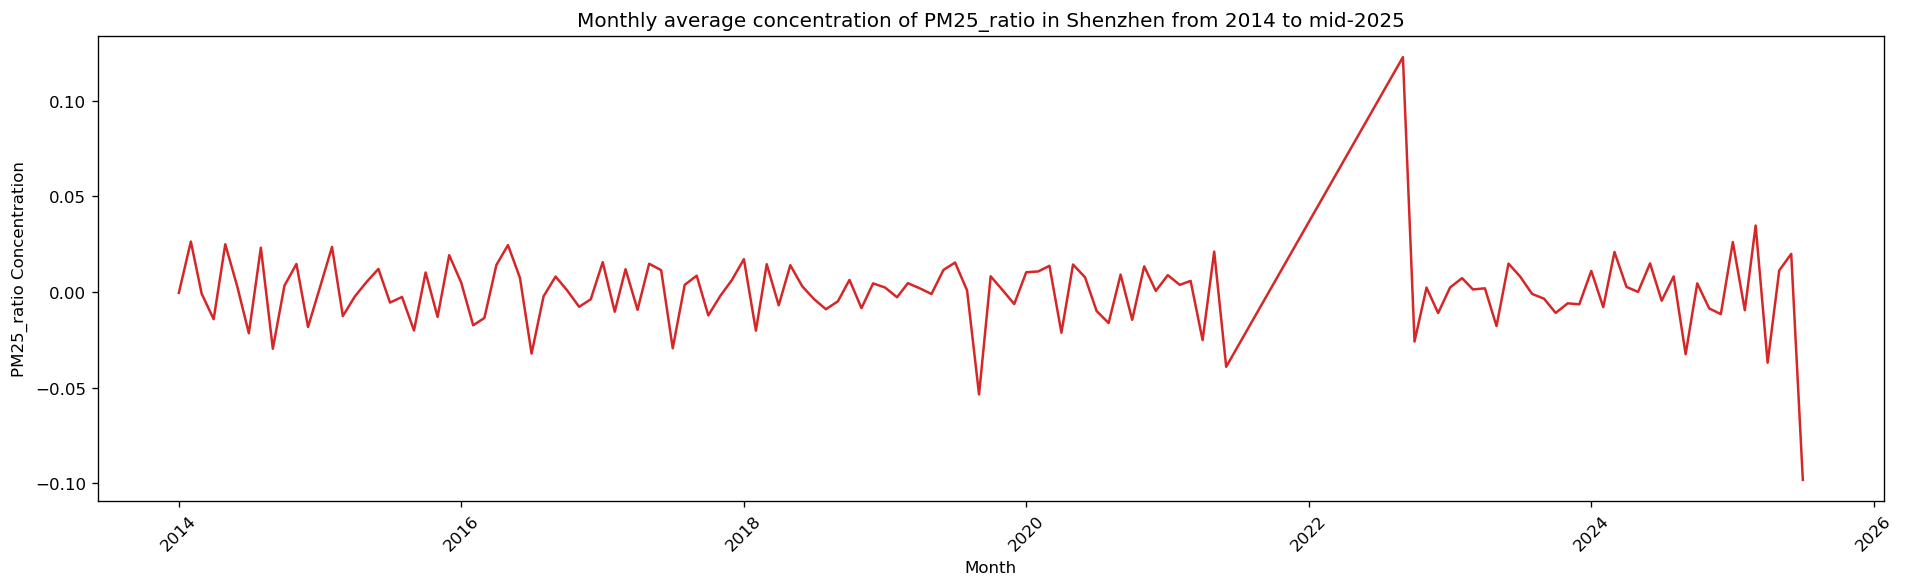

In [34]:
monthlyAverage(szn_df_ratio, 'Shenzhen','PM25_ratio')

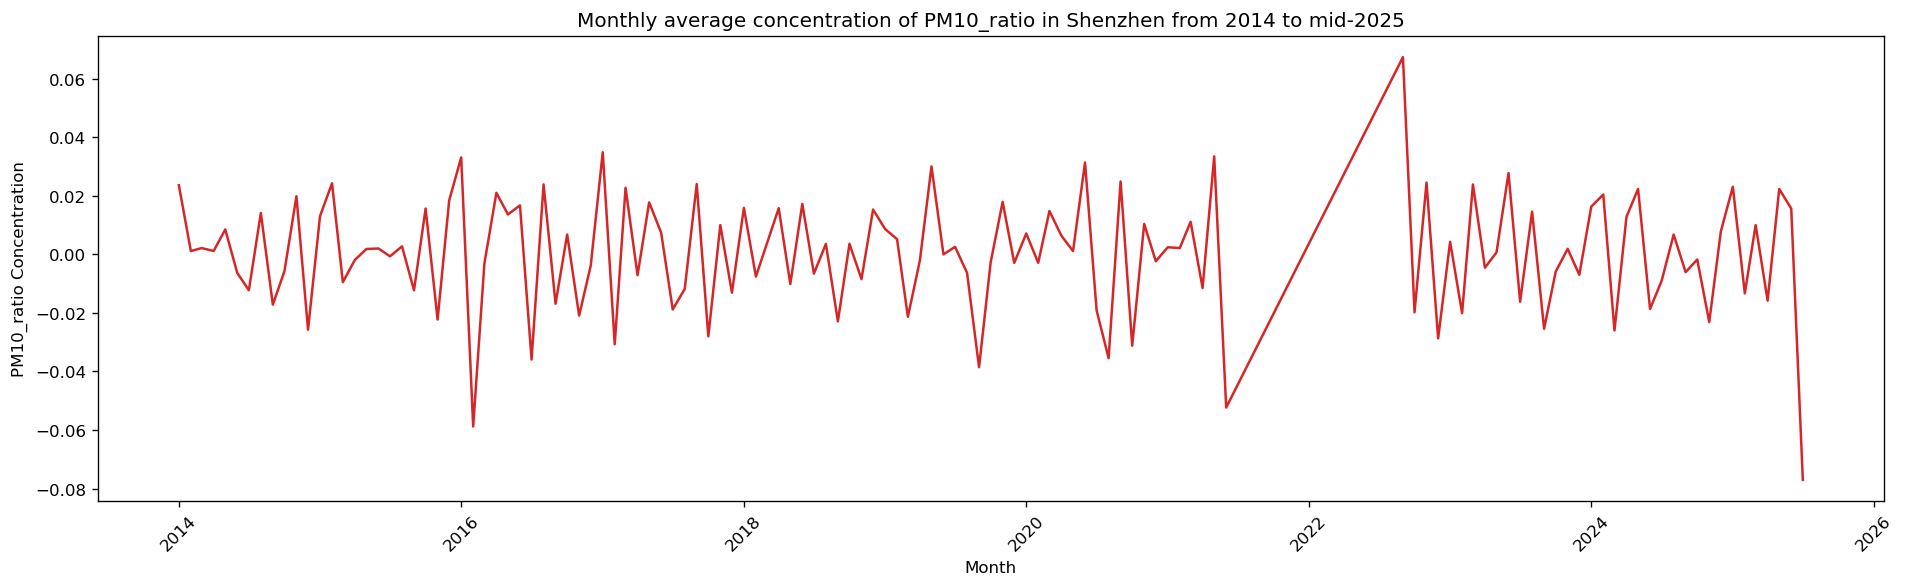

In [35]:
monthlyAverage(szn_df_ratio, 'Shenzhen','PM10_ratio')

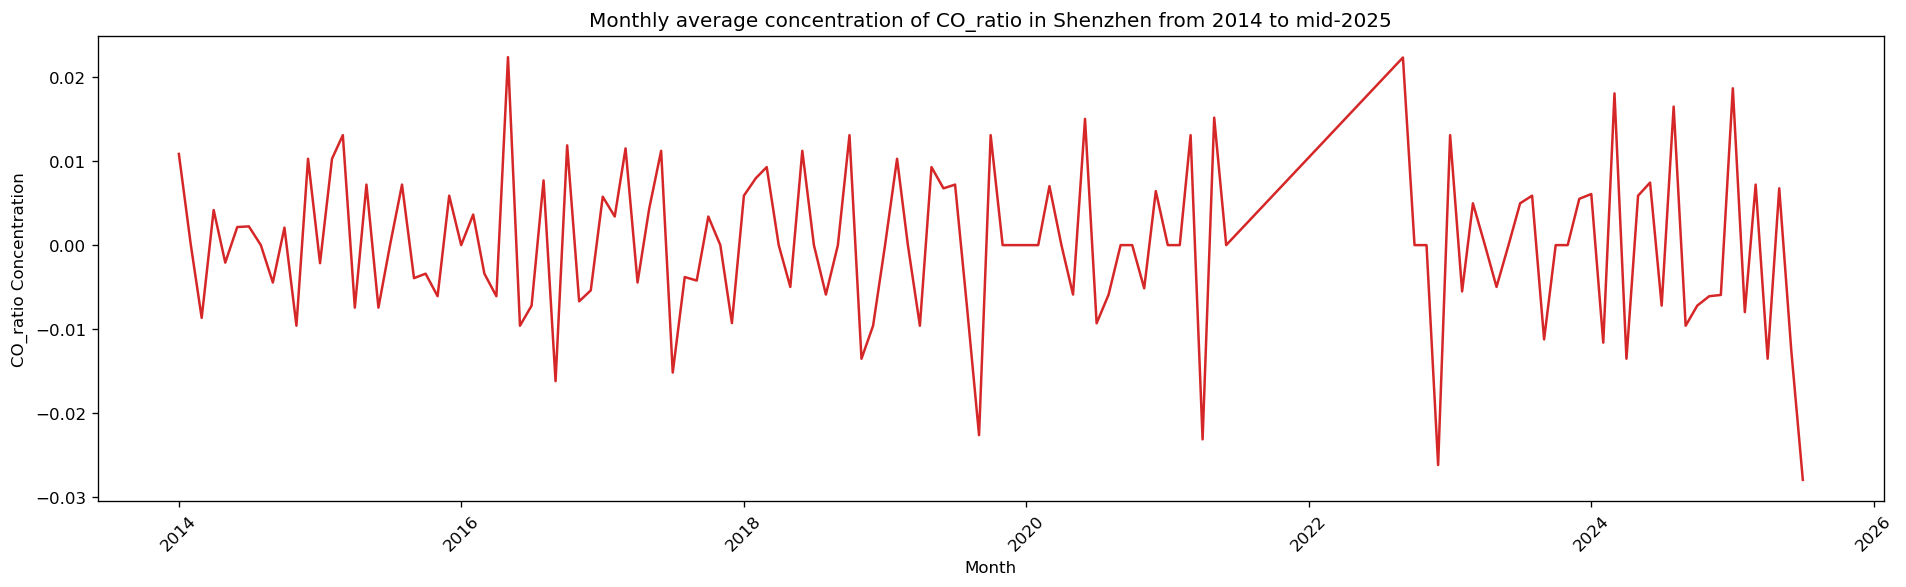

In [36]:
monthlyAverage(szn_df_ratio, 'Shenzhen','CO_ratio')

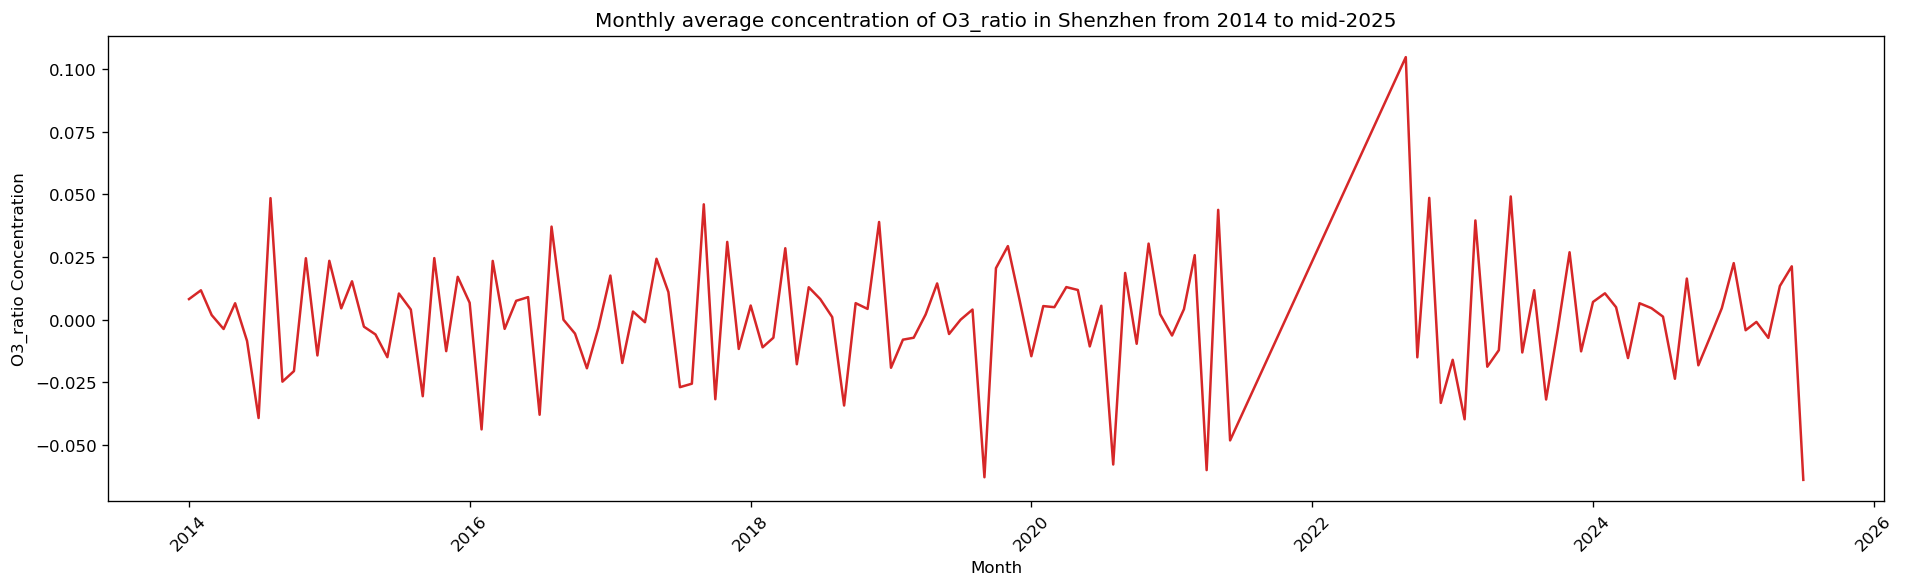

In [37]:
monthlyAverage(szn_df_ratio, 'Shenzhen','O3_ratio')

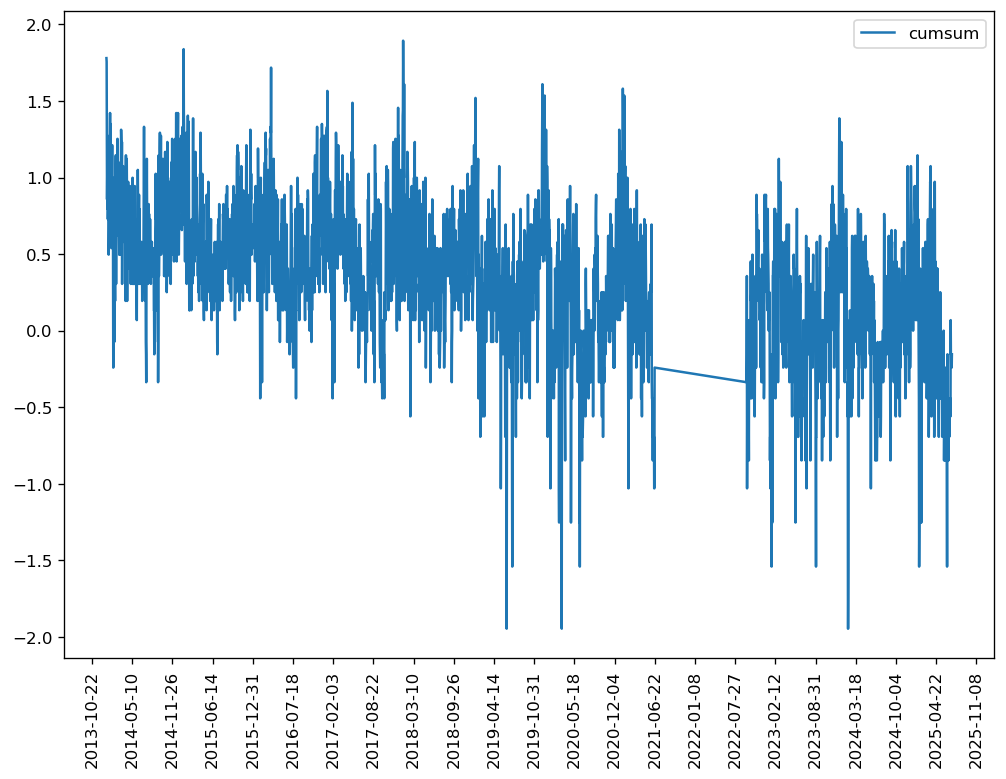

In [38]:
szn_df_ratio['log_cumsum_no2'] = szn_df_ratio['NO2_ratio'].cumsum()
plt.plot(szn_df_ratio['date'] ,szn_df_ratio['log_cumsum_no2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

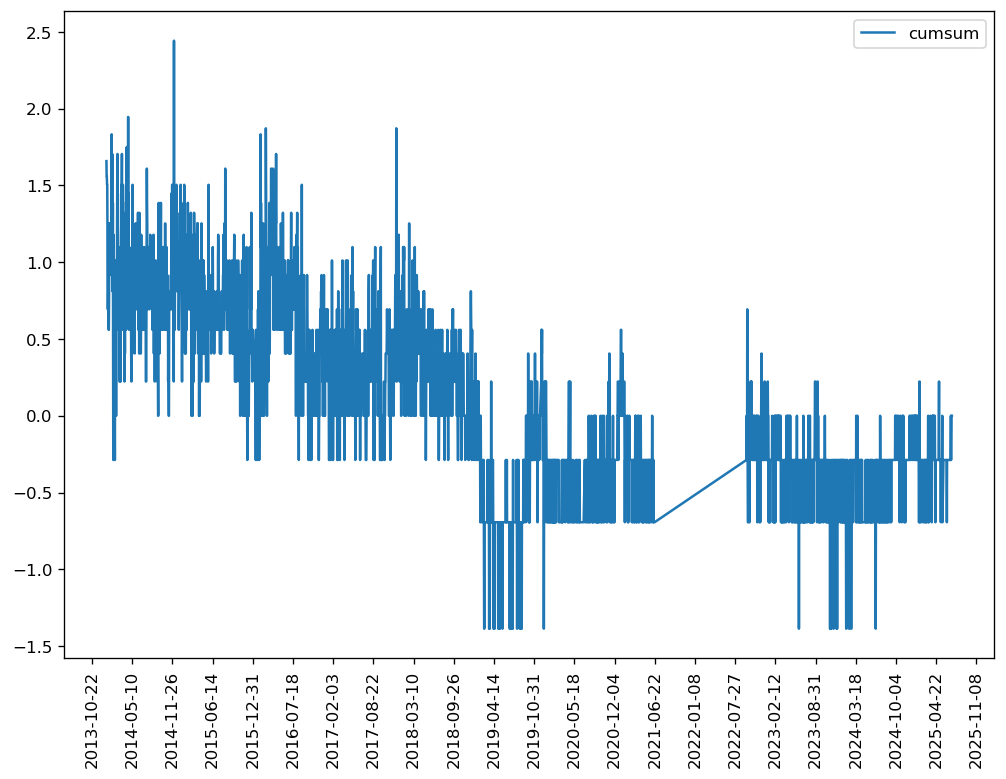

In [39]:
szn_df_ratio['log_cumsum_so2'] = szn_df_ratio['SO2_ratio'].cumsum()
plt.plot(szn_df_ratio['date'] ,szn_df_ratio['log_cumsum_so2'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

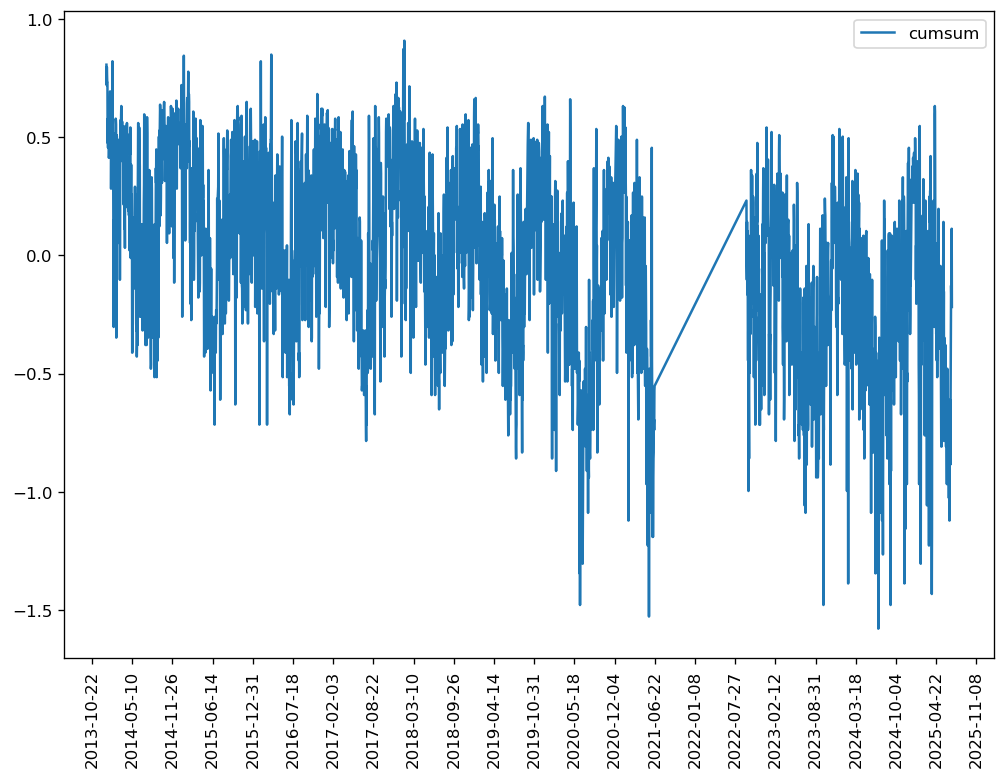

In [40]:
szn_df_ratio['log_cumsum_pm25'] = szn_df_ratio['PM25_ratio'].cumsum()
plt.plot(szn_df_ratio['date'] ,szn_df_ratio['log_cumsum_pm25'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

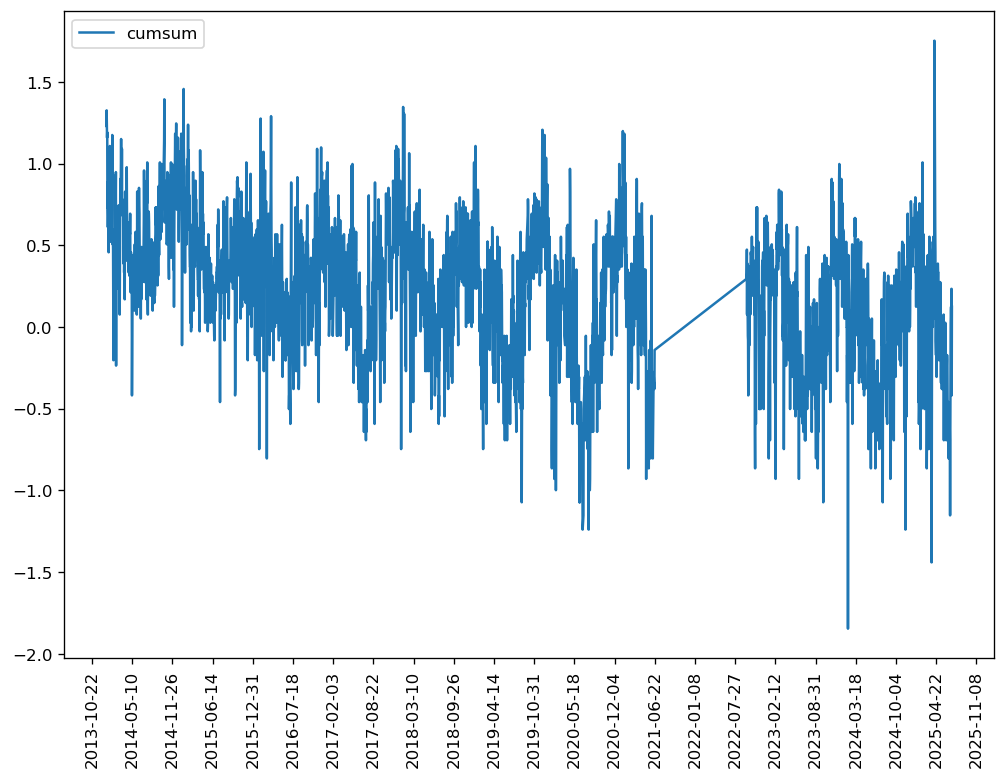

In [41]:
szn_df_ratio['log_cumsum_pm10'] = szn_df_ratio['PM10_ratio'].cumsum()
plt.plot(szn_df_ratio['date'] ,szn_df_ratio['log_cumsum_pm10'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

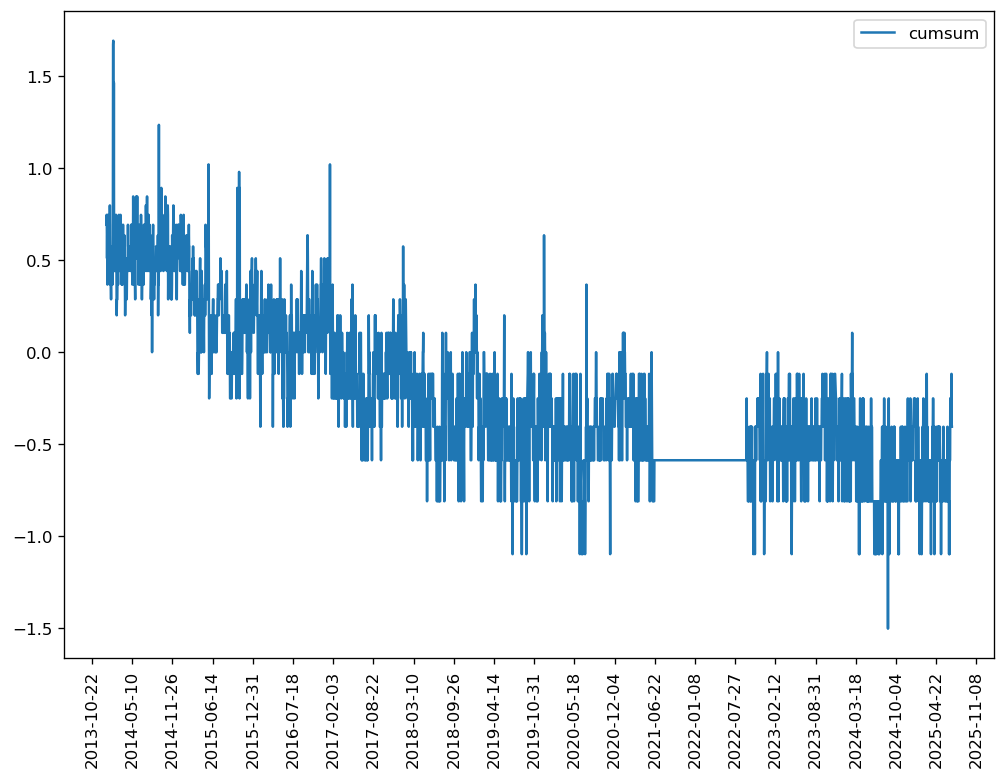

In [42]:
szn_df_ratio['log_cumsum_co'] = szn_df_ratio['CO_ratio'].cumsum()
plt.plot(szn_df_ratio['date'] ,szn_df_ratio['log_cumsum_co'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

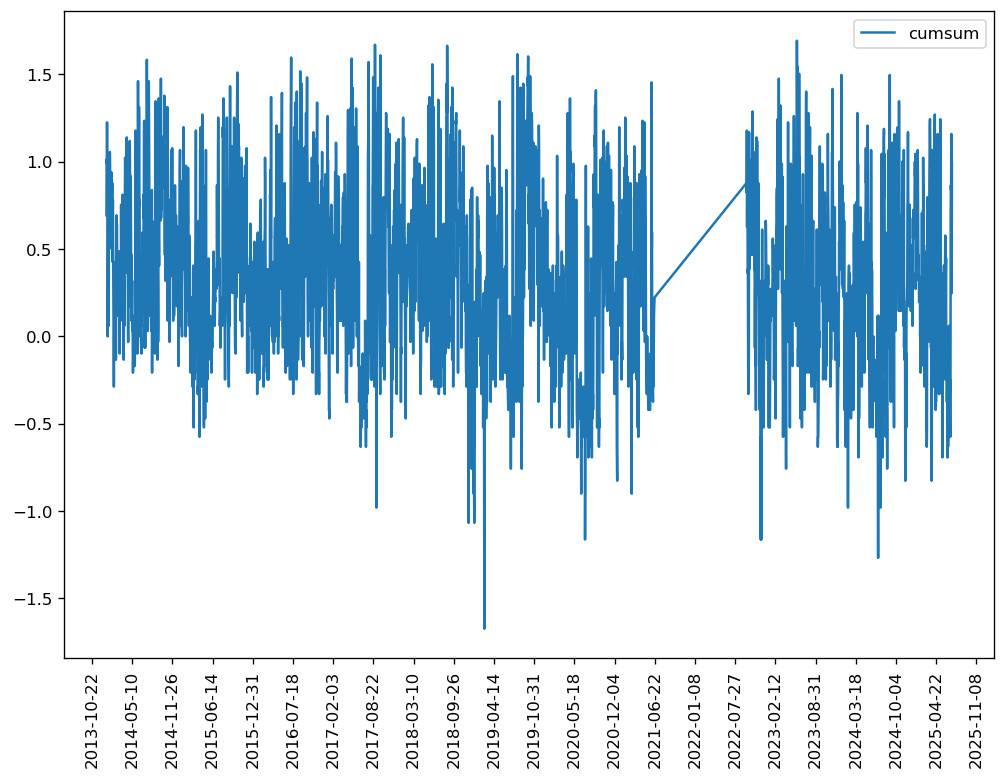

In [43]:
szn_df_ratio['log_cumsum_o3'] = szn_df_ratio['O3_ratio'].cumsum()
plt.plot(szn_df_ratio['date'] ,szn_df_ratio['log_cumsum_o3'], label ='cumsum')
plt.xticks(rotation=90)
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(30))

# Eliminating Trend and Seasonality

If we eliminate trend and seasonality, we can observe clear volatility clustering. This is reasonable given the nature of air pollutants: government policies often have multi-year effects, weather patterns remain relatively stable within a season, and most decisions that impact air quality tend to have long-term consequences.

In [44]:
!pip install arch

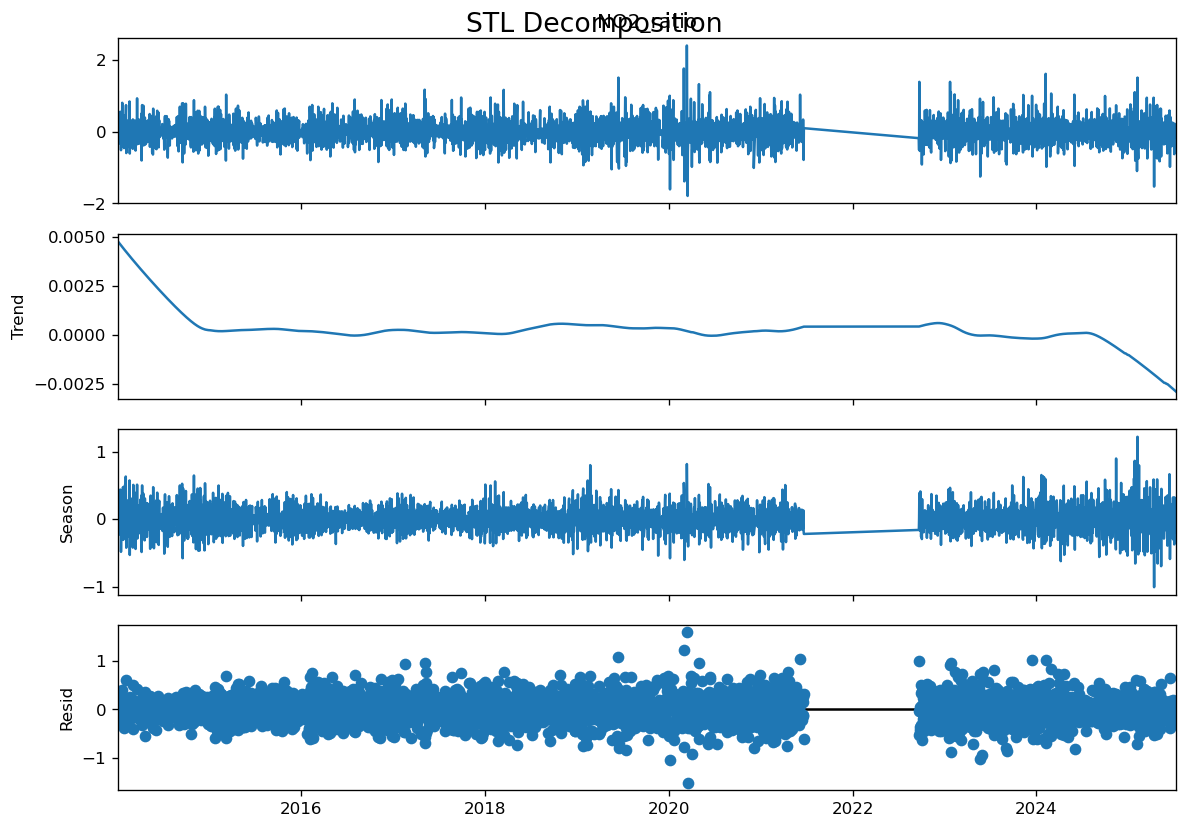

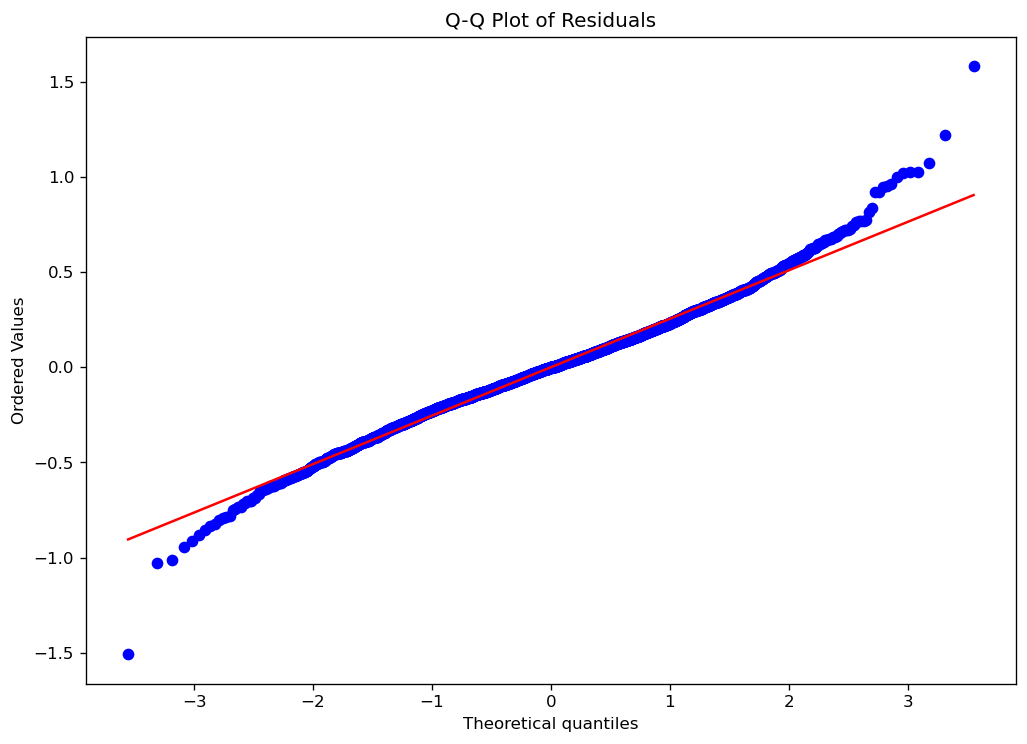

Shapiro-Wilk Test statistic=0.9879, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.stats import shapiro, probplot

szn_df_ratio['date'] = pd.to_datetime(szn_df_ratio['date'])
szn_df_ratio = szn_df_ratio.sort_values('date')
szn_df_ratio.set_index('date', inplace=True)

df = szn_df_ratio.copy()


stl = STL(df['NO2_ratio'], period=365) 
res_NO2 = stl.fit()

res_NO2.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_NO2 = res_NO2.resid.dropna()

# Q-Q Plot
probplot(residuals_NO2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_NO2)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8479.72
Distribution:      Standardized Student's t   AIC:                           16969.4
Method:                  Maximum Likelihood   BIC:                           17000.5
                                              No. Observations:                 3669
Date:                      Fri, Jul 11 2025   Df Residuals:                     3668
Time:                              09:42:00   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

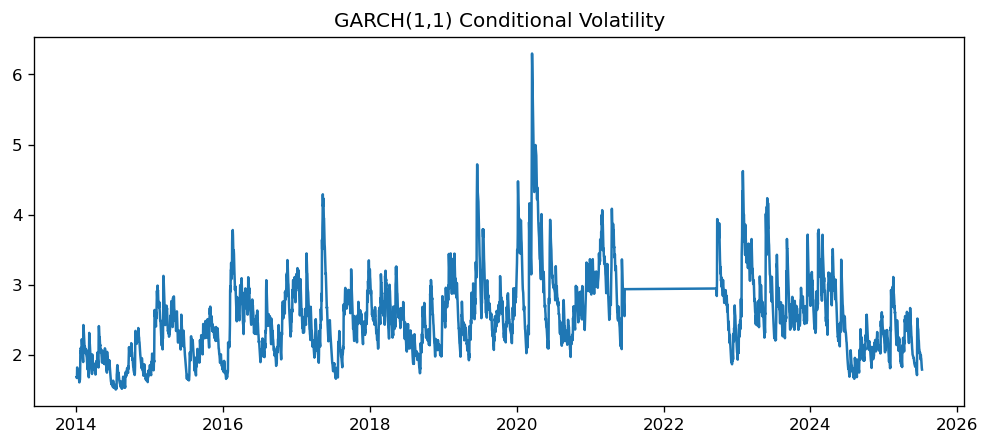

In [46]:
from arch import arch_model
import matplotlib.pyplot as plt

# residuals
residuals_NO2 = res_NO2.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_NO2, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anacond

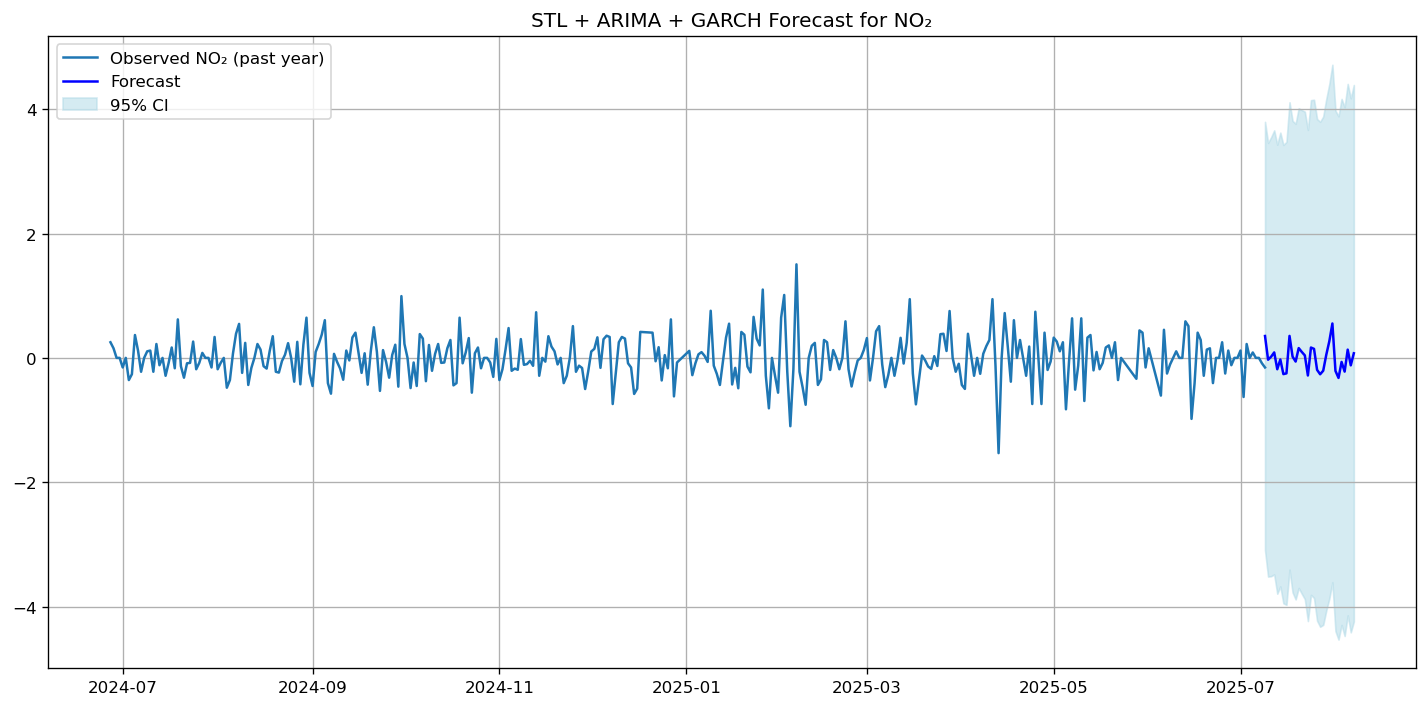

In [ ]:
# Forecast

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Prepare the data
df = szn_df_ratio.copy()

df = df.sort_index()
series = df['NO2_ratio'].interpolate()

# STL decomposition
stl = STL(series, period=365)
res = stl.fit()

trend = res.trend
seasonal = res.seasonal
resid = res.resid.dropna()

# Fit ARIMA on trend to forecast the deterministic part
model_arima = ARIMA(trend.dropna(), order=(1,1,1))  # you can optimize this
arima_result = model_arima.fit()
trend_forecast = arima_result.forecast(steps=30)

# Forecast seasonal component by repeating last year’s seasonality
# (naive but effective for seasonal series)
seasonal_forecast = seasonal[-365:].values[:30]

# Fit GARCH on residuals to forecast volatility
garch_model = arch_model(resid, vol='GARCH', p=1, q=1, dist='t', rescale=True)
garch_result = garch_model.fit(disp='off')
resid_vol_forecast = garch_result.forecast(horizon=30)
vol_forecast = np.sqrt(resid_vol_forecast.variance.values[-1, :])  # conditional std dev

# Combine all forecasts (mean + seasonality ± volatility)
forecast_mean = trend_forecast.values + seasonal_forecast
forecast_upper = forecast_mean + 1.96 * vol_forecast
forecast_lower = forecast_mean - 1.96 * vol_forecast

# Plot
plt.figure(figsize=(12,6))
plt.plot(series.index[-365:], series[-365:], label='Observed NO₂ (past year)')
plt.plot(pd.date_range(series.index[-1], periods=30, freq='D'), forecast_mean, label='Forecast', color='blue')
plt.fill_between(pd.date_range(series.index[-1], periods=30, freq='D'), forecast_lower, forecast_upper, color='lightblue', alpha=0.5, label='95% CI')
plt.title("STL + ARIMA + GARCH Forecast for NO₂")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


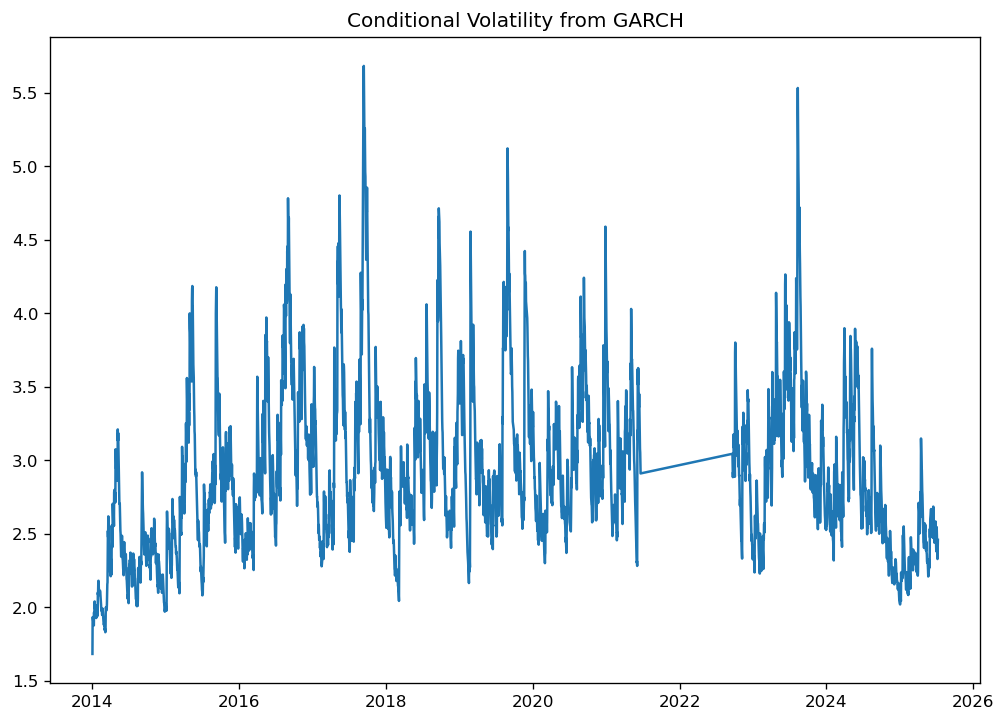

In [59]:
plt.plot(garch_fit.conditional_volatility)
plt.title("Conditional Volatility from GARCH")
plt.show()

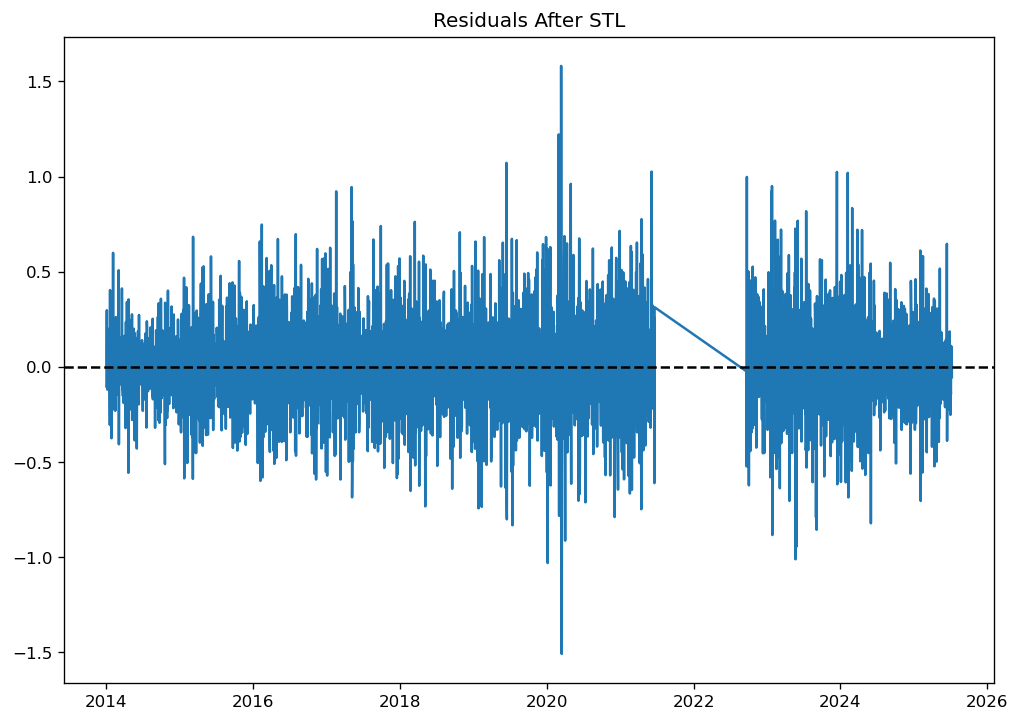

In [73]:
plt.plot(residuals_NO2)
plt.title("Residuals After STL")
plt.axhline(0, color='black', linestyle='--')
plt.show()


ADF Statistic: -17.7517, p-value: 0.0000
Series is stationary (reject H0)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:              NO2_ratio   No. Observations:                 3669
Model:               MarkovRegression   Log Likelihood               -1001.802
Date:                Fri, 11 Jul 2025   AIC                           2015.605
Time:                        10:16:33   BIC                           2052.851
Sample:                             0   HQIC                          2028.866
                               - 3669                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.005     -0.534      0.593      -0.013       0.008
sigma2         0.0634      0.006     10.178      0.0

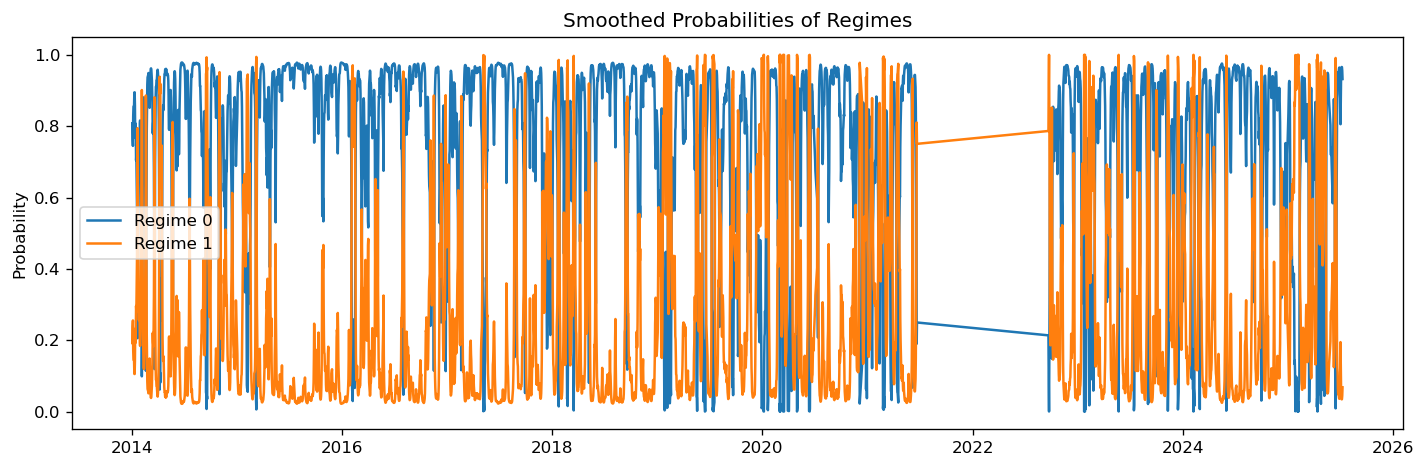

In [65]:
# Regime Switching


# 1. Clean & preprocess
df = szn_df_ratio.copy()
df = df.dropna(subset=['NO2_ratio'])         # Drop NAs
df['NO2_ratio'] = df['NO2_ratio'].astype(float)

# 2. Sort and set datetime index
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# 3. Downsample or resample if needed (optional)
# df = df.resample('D').mean().dropna()      # Optional: daily mean to smooth spikes

# 4. Fix frequency to prevent forecast warnings
df = df.asfreq(pd.infer_freq(df.index))

# Ensure numeric and clean data
df['NO2_ratio'] = pd.to_numeric(df['NO2_ratio'], errors='coerce')

# Drop rows with NaN or infinite values
df = df[np.isfinite(df['NO2_ratio'])]  # remove infs
df = df.dropna(subset=['NO2_ratio'])  # remove NaNs

# 5. Check for numerical stability
from statsmodels.tsa.stattools import adfuller
# Stationarity check
adf_result = adfuller(df['NO2_ratio'])
print(f"ADF Statistic: {adf_result[0]:.4f}, p-value: {adf_result[1]:.4f}")

if adf_result[1] < 0.05:
    print("Series is stationary (reject H0)")
else:
    print("⚠️ Series is non-stationary (fail to reject H0)")

# Optionally difference if non-stationary
if adf_result[1] > 0.05:
    df['NO2_ratio_diff'] = df['NO2_ratio'].diff().dropna()
    series_to_use = df['NO2_ratio_diff'].dropna()
else:
    series_to_use = df['NO2_ratio']

# 6. Fit Markov Switching model
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

model = MarkovRegression(series_to_use, k_regimes=2, trend='c', switching_variance=True)

try:
    result = model.fit()
    print(result.summary())

    # 7. Plot smoothed probabilities manually
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(12, 4))
    for i in range(result.k_regimes):
        ax.plot(result.smoothed_marginal_probabilities[i], label=f"Regime {i}")
    ax.set_title("Smoothed Probabilities of Regimes")
    ax.set_ylabel("Probability")
    ax.legend()
    plt.tight_layout()
    plt.show()

except np.linalg.LinAlgError as e:
    print(f"Model fitting failed due to a linear algebra issue: {e}")

Transition matrix:
 [[0.06341641 0.93658359]
 [0.75959221 0.24040779]]


/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_87038/1188555944.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p00 = result.params[-2]
/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_87038/1188555944.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p11 = result.params[-1]
/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_87038/1188555944.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reg

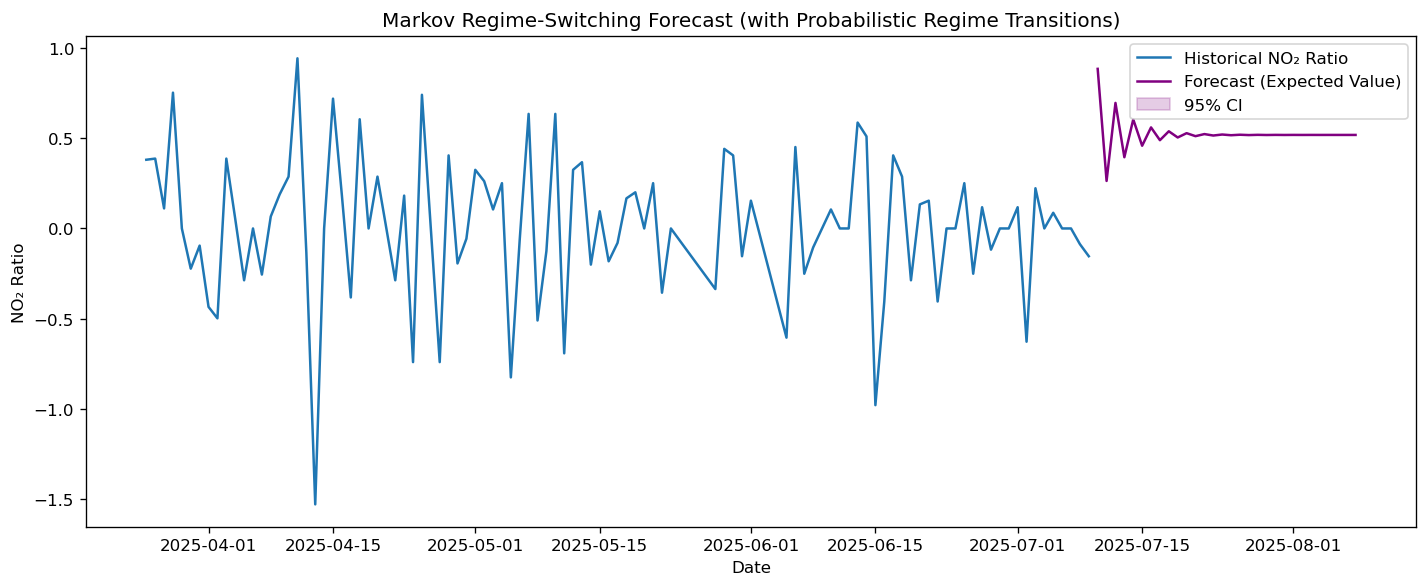

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extract transition matrix manually from parameters
# Format: [p00, p11] where pij = prob of staying in same regime
p00 = result.params[-2]
p11 = result.params[-1]
p01 = 1 - p00
p10 = 1 - p11

P = np.array([[p00, p01],
              [p10, p11]])

print("Transition matrix:\n", P)

# 2. Get most recent smoothed regime probabilities
last_probs = result.smoothed_marginal_probabilities.iloc[-1].values

# 3. Extract regime-specific means
regime_means = [result.params[0], result.params[1]]

# 4. Standard deviations per regime
regime_stds = [np.sqrt(result.params[2]), np.sqrt(result.params[3])]

# 5. Forecast horizon
n_forecast = 30
forecast = []
forecast_ci_upper = []
forecast_ci_lower = []

probs = last_probs.copy()
for _ in range(n_forecast):
    mean = np.dot(probs, regime_means)
    std = np.sqrt(np.dot(probs, [s**2 for s in regime_stds]))
    
    forecast.append(mean)
    forecast_ci_upper.append(mean + 1.96 * std)
    forecast_ci_lower.append(mean - 1.96 * std)
    
    # Propagate regime probabilities
    probs = np.dot(probs, P)

# 6. Plotting
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')

plt.figure(figsize=(12, 5))
plt.plot(df.index[-100:], df['NO2_ratio'].iloc[-100:], label="Historical NO₂ Ratio")
plt.plot(forecast_index, forecast, label="Forecast (Expected Value)", color='purple')
plt.fill_between(forecast_index, forecast_ci_lower, forecast_ci_upper, color='purple', alpha=0.2, label='95% CI')
plt.title("Markov Regime-Switching Forecast (with Probabilistic Regime Transitions)")
plt.xlabel("Date")
plt.ylabel("NO₂ Ratio")
plt.legend()
plt.tight_layout()
plt.show()


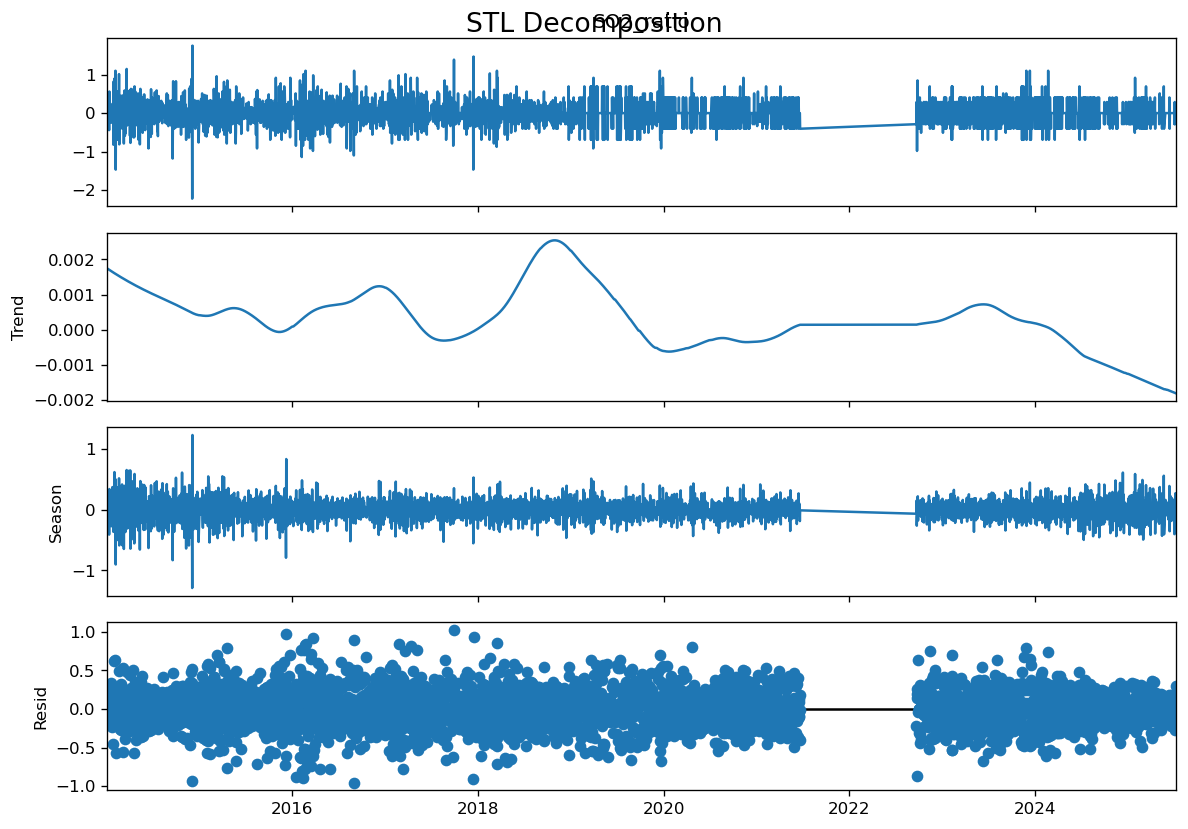

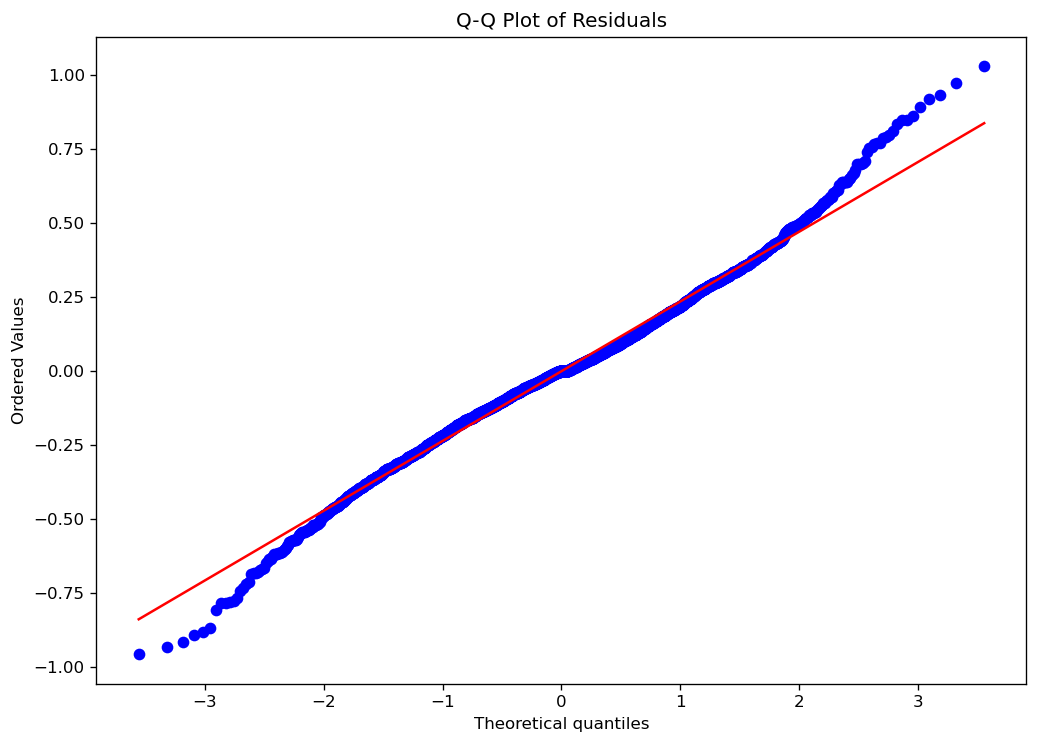

Shapiro-Wilk Test statistic=0.9905, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -8211.16
Distribution:      Standardized Student's t   AIC:                           16432.3
Method:                  Maximum Likelihood   BIC:                           16463.4
                                              No. Observations:                 3669
Date:                      Fri, Jul 11 2025   Df Residuals:                     3668
Time:                              09:42:01   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

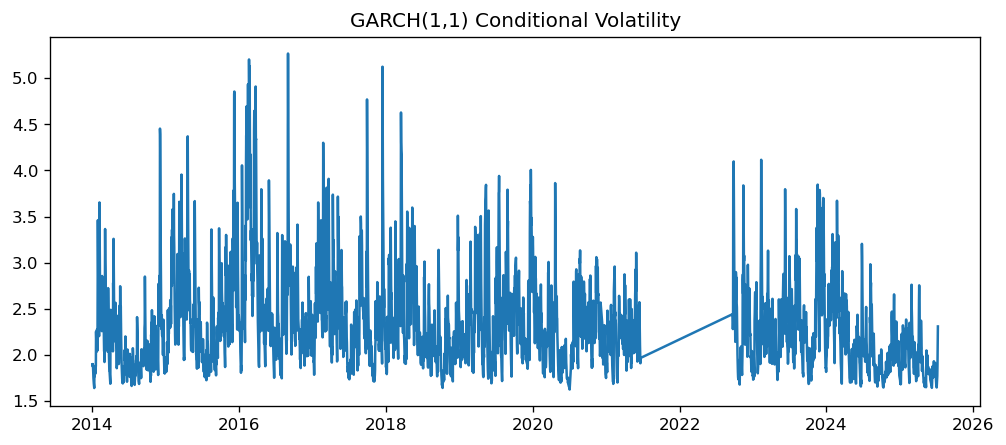

In [47]:
stl = STL(df['SO2_ratio'], period=365) 
res_SO2 = stl.fit()

res_SO2.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_SO2 = res_SO2.resid.dropna()

# Q-Q Plot
probplot(residuals_SO2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_SO2)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_SO2 = res_SO2.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_SO2, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

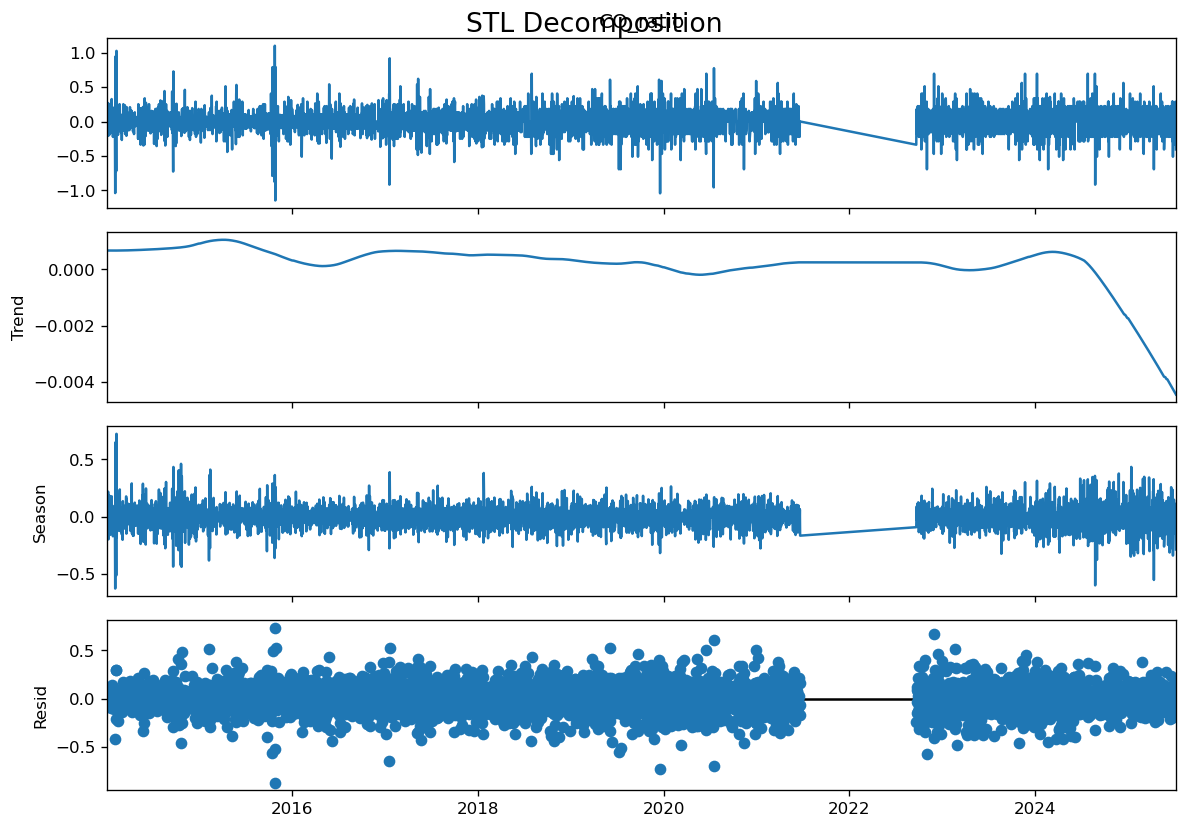

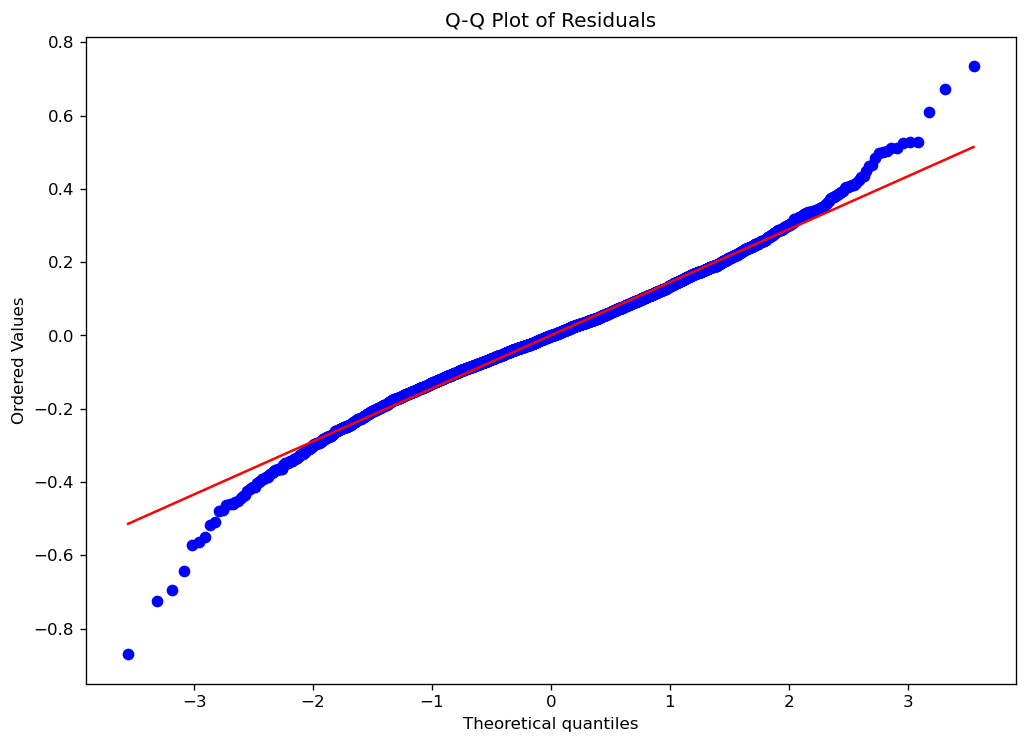

Shapiro-Wilk Test statistic=0.9877, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -6432.75
Distribution:      Standardized Student's t   AIC:                           12875.5
Method:                  Maximum Likelihood   BIC:                           12906.5
                                              No. Observations:                 3669
Date:                      Fri, Jul 11 2025   Df Residuals:                     3668
Time:                              09:42:01   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

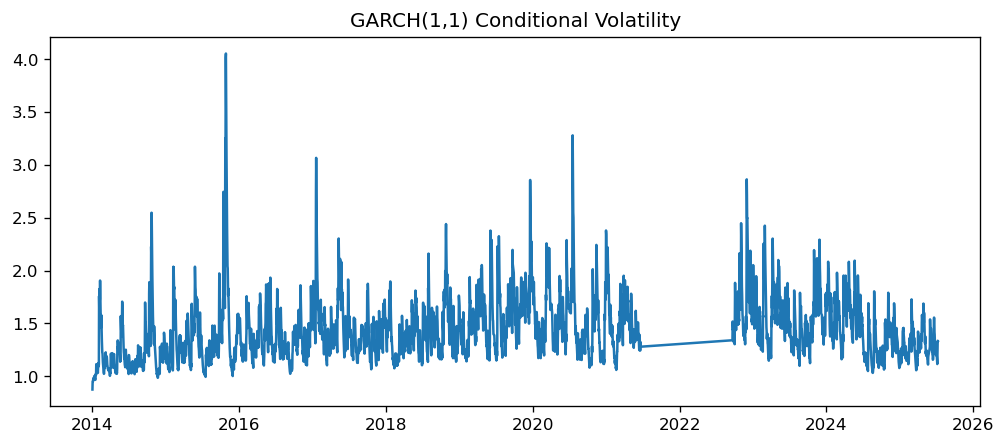

In [48]:
stl = STL(df['CO_ratio'], period=365) 
res_CO = stl.fit()

res_CO.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_CO = res_CO.resid.dropna()

# Q-Q Plot
probplot(residuals_CO, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_CO)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_CO = res_CO.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_CO, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

In [ ]:
# ================================

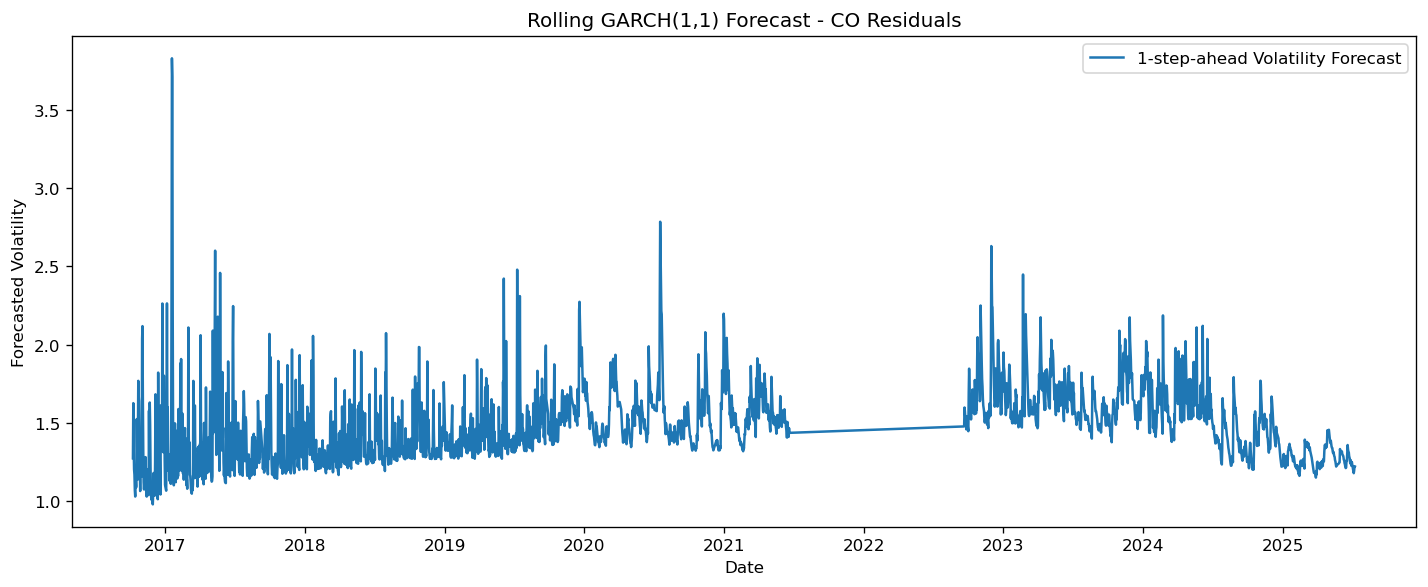


 Latest GARCH(1,1) Fit Summary on Final Window:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1813.80
Distribution:      Standardized Student's t   AIC:                           3637.60
Method:                  Maximum Likelihood   BIC:                           3662.14
                                              No. Observations:                 1000
Date:                      Fri, Jul 11 2025   Df Residuals:                      999
Time:                              10:26:17   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------

In [71]:
# Rolling ARCH forecast

import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt

# From previous STL decomposition
residuals_CO = res_CO.resid.dropna()

window_size = 1000
forecast_horizon = 1
rolling_steps = len(residuals_CO) - window_size

forecast_volatility = []
fitted_models = []

for i in range(rolling_steps):
    train = residuals_CO[i : i + window_size]

    model = arch_model(train, vol='GARCH', p=1, q=1, dist='t', rescale=True)
    fitted = model.fit(disp='off')

    forecast = fitted.forecast(horizon=forecast_horizon)
    vol_forecast = forecast.variance.values[-1, 0]

    forecast_volatility.append(np.sqrt(vol_forecast))
    fitted_models.append(fitted)

# Create forecast time index
forecast_index = residuals_CO.index[window_size:]

# Plot forecasted volatility
plt.figure(figsize=(12, 5))
plt.plot(forecast_index, forecast_volatility, label='1-step-ahead Volatility Forecast')
plt.title('Rolling GARCH(1,1) Forecast - CO Residuals')
plt.xlabel('Date')
plt.ylabel('Forecasted Volatility')
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Print latest model summary
print("\n Latest GARCH(1,1) Fit Summary on Final Window:")
print(fitted_models[-1].summary())

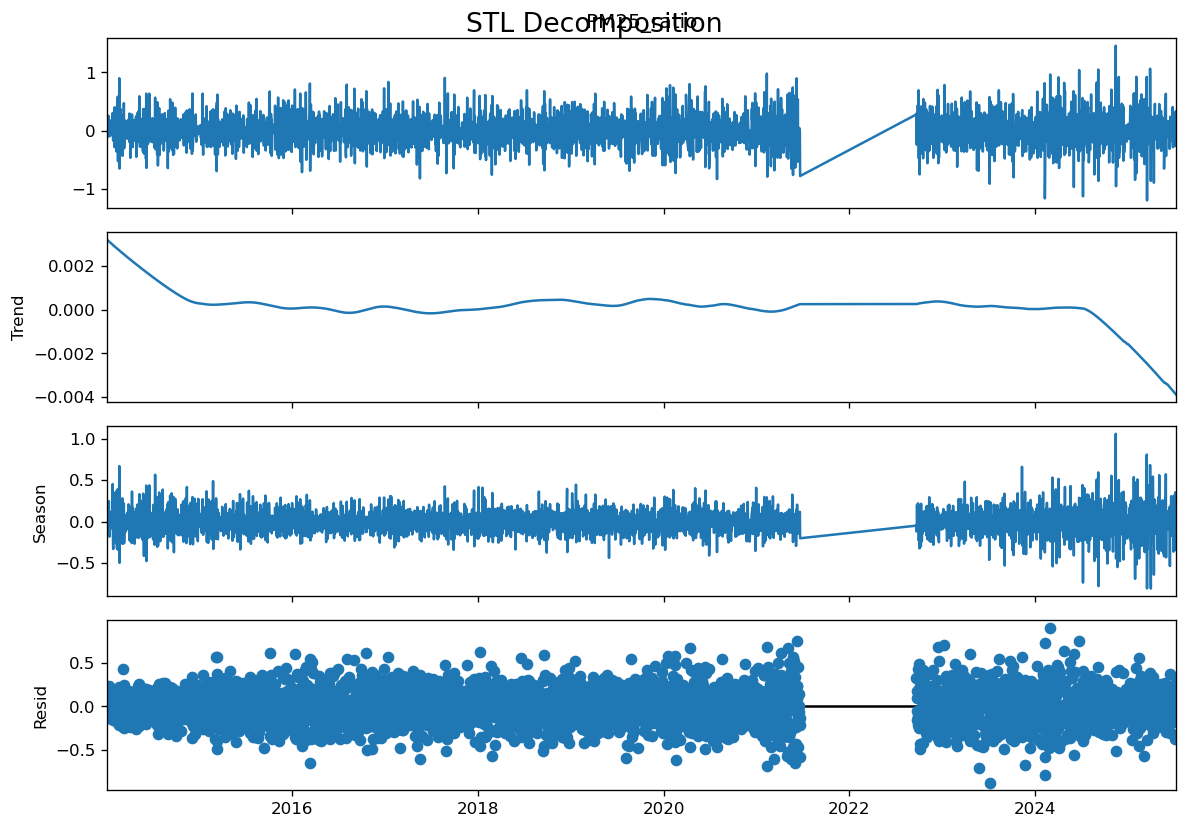

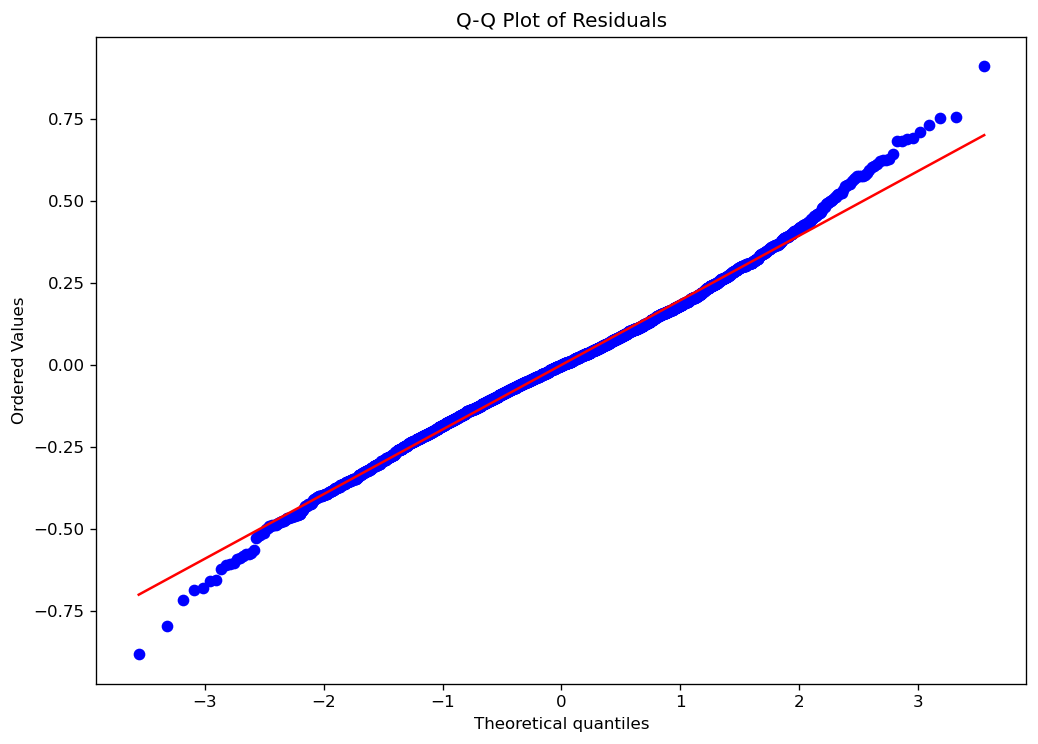

Shapiro-Wilk Test statistic=0.9942, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7570.27
Distribution:      Standardized Student's t   AIC:                           15150.5
Method:                  Maximum Likelihood   BIC:                           15181.6
                                              No. Observations:                 3669
Date:                      Fri, Jul 11 2025   Df Residuals:                     3668
Time:                              10:39:25   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

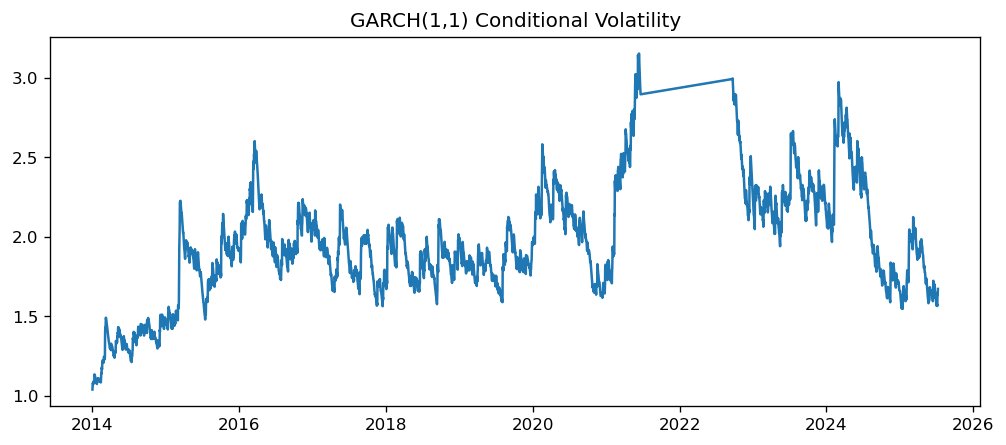

In [82]:
stl = STL(df['PM25_ratio'], period=365) 
res_PM25 = stl.fit()

res_PM25.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_PM25 = res_PM25.resid.dropna()

# Q-Q Plot
probplot(residuals_PM25, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_PM25)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_PM25 = res_PM25.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_PM25, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

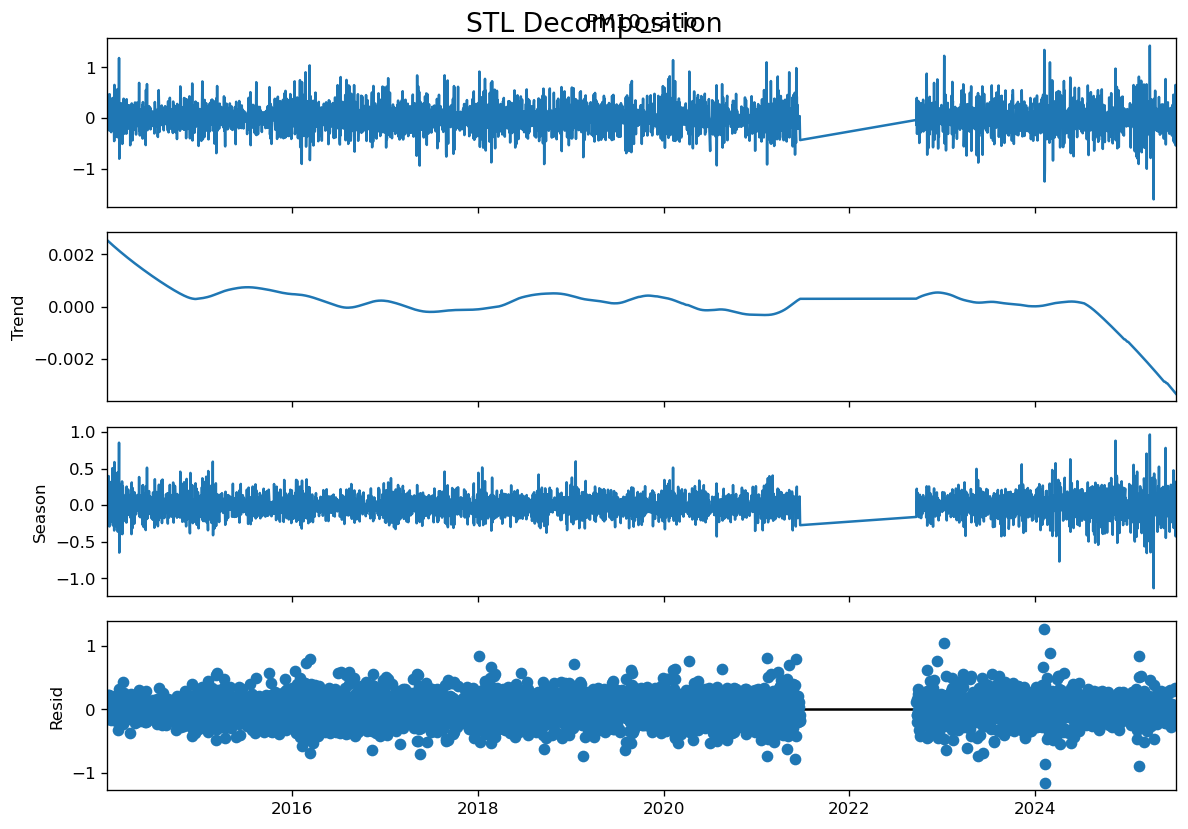

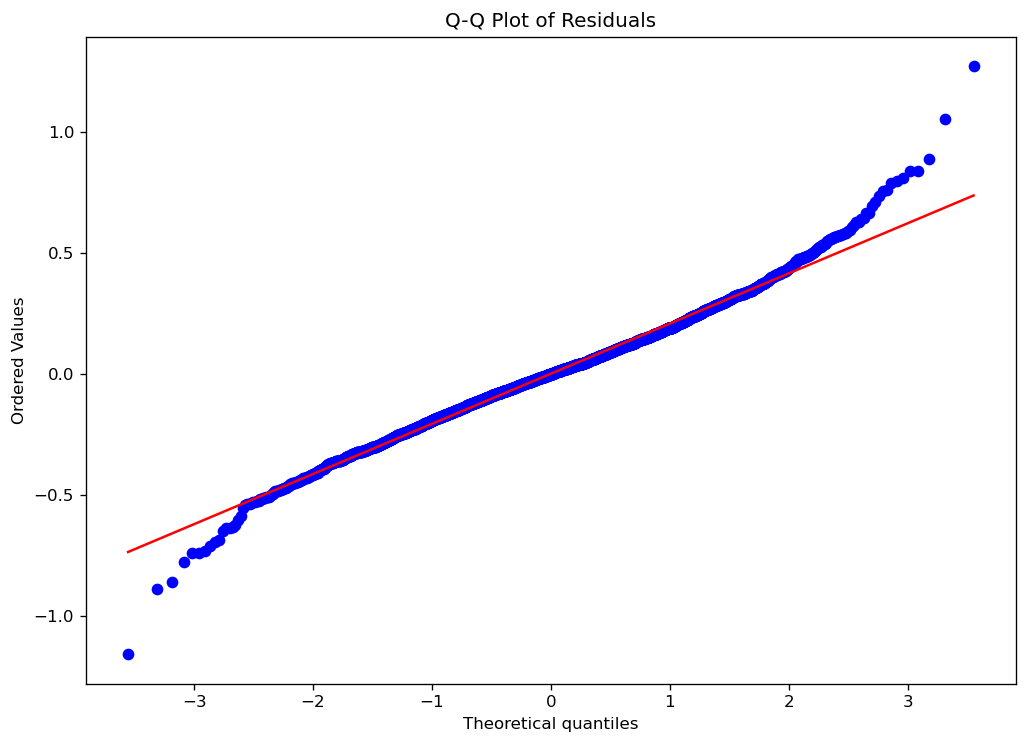

Shapiro-Wilk Test statistic=0.9887, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7744.43
Distribution:      Standardized Student's t   AIC:                           15498.9
Method:                  Maximum Likelihood   BIC:                           15529.9
                                              No. Observations:                 3669
Date:                      Fri, Jul 11 2025   Df Residuals:                     3668
Time:                              10:39:23   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t    

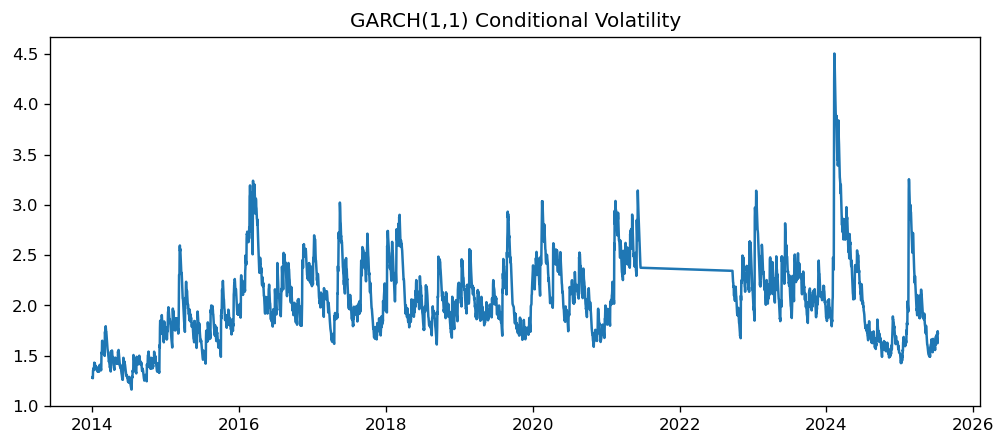

In [80]:
stl = STL(df['PM10_ratio'], period=365) 
res_PM10 = stl.fit()

res_PM10.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_PM10 = res_PM10.resid.dropna()

# Q-Q Plot
probplot(residuals_PM10, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_PM10)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_PM10 = res_PM10.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_PM10, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()

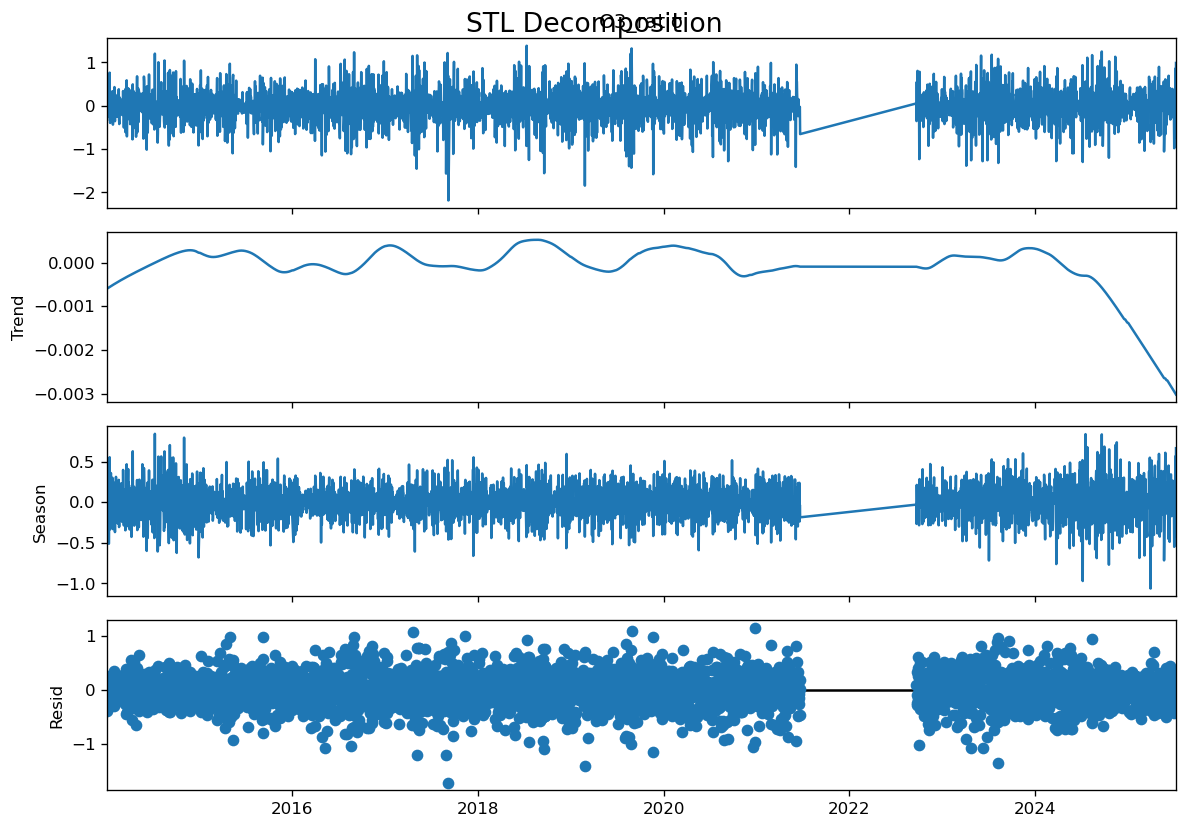

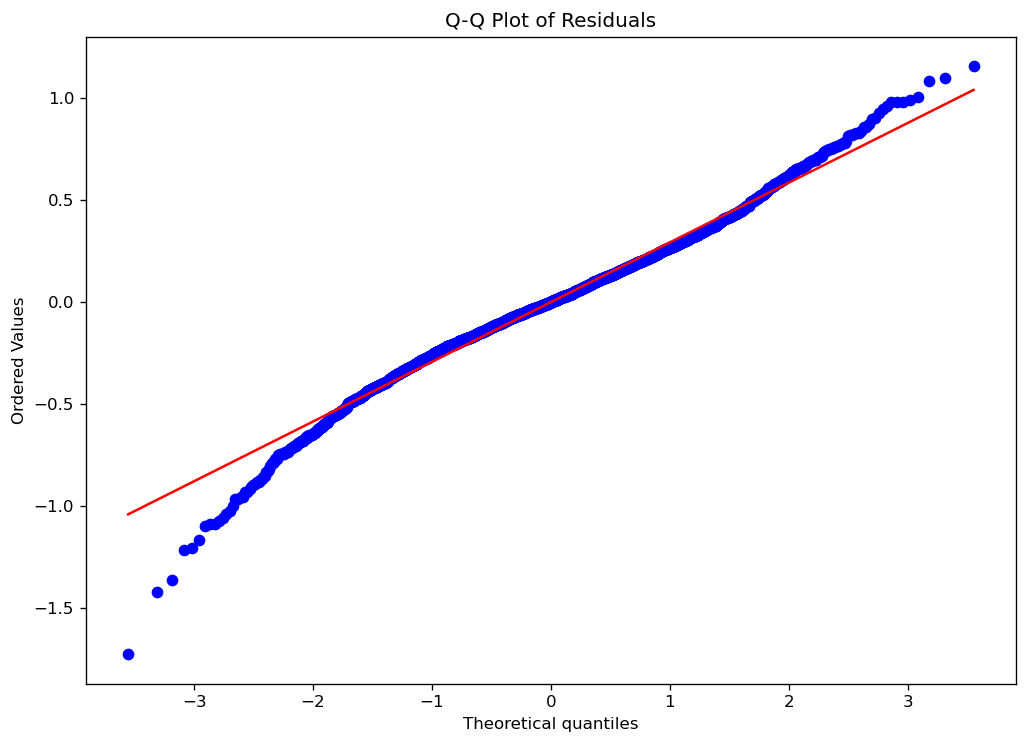

Shapiro-Wilk Test statistic=0.9864, p-value=0.0000
❌ Residuals do not look normally distributed (reject H0)
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        resid   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -9014.70
Distribution:      Standardized Student's t   AIC:                           18039.4
Method:                  Maximum Likelihood   BIC:                           18070.4
                                              No. Observations:                 3669
Date:                      Fri, Jul 11 2025   Df Residuals:                     3668
Time:                              10:39:24   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      

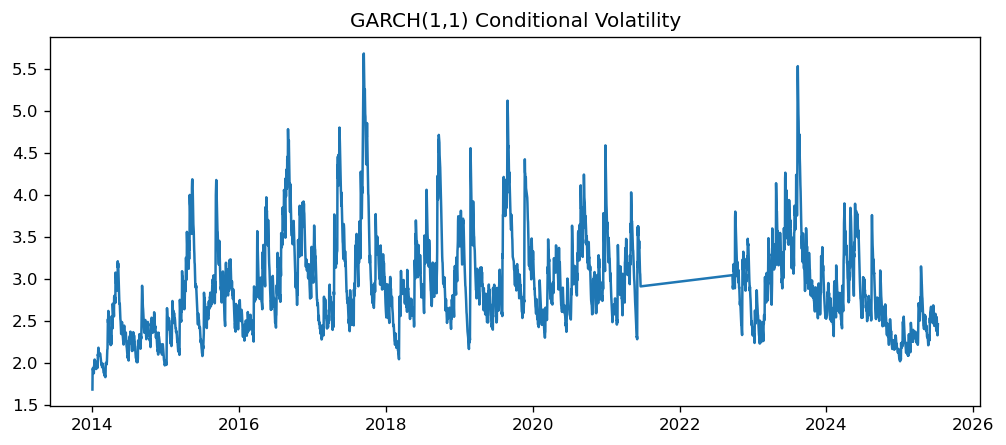

In [81]:
stl = STL(df['O3_ratio'], period=365) 
res_O3 = stl.fit()

res_O3.plot()
plt.suptitle('STL Decomposition', fontsize=16)
plt.show()


residuals_O3 = res_O3.resid.dropna()

# Q-Q Plot
probplot(residuals_O3, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk Test
stat, p = shapiro(residuals_O3)
print('Shapiro-Wilk Test statistic=%.4f, p-value=%.4f' % (stat, p))

if p > 0.05:
    print("✅ Residuals look normally distributed (fail to reject H0)")
else:
    print("❌ Residuals do not look normally distributed (reject H0)")

# residuals
residuals_O3 = res_O3.resid.dropna()

# GARCH(1,1) model with t-distribution
garch_model = arch_model(residuals_O3, vol='GARCH', p=1, q=1,dist ='t', rescale=True)
garch_fit = garch_model.fit(disp="off")
print(garch_fit.summary())

# visualization of conditional volatility 
plt.figure(figsize=(10,4))
plt.plot(garch_fit.conditional_volatility)
plt.title("GARCH(1,1) Conditional Volatility")
plt.show()